## Final Project Submission

Please fill out: 
* Student name: ***Aysu Erdemir***
* Student pace: ****Self Paced***
* Scheduled project review date/time: ***August, 2022***
* Instructor name: ***Claude Fried***

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv("./data/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [5]:
df.shape

(21597, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [7]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df[df.duplicated('id')].head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
94,6021501535,12/23/2014,700000.0,3,1.50,1580,5000,1.0,NO,NONE,...,8 Good,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
314,4139480200,12/9/2014,1400000.0,4,3.25,4290,12103,1.0,NO,GOOD,...,11 Excellent,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
325,7520000520,3/11/2015,240500.0,2,1.00,1240,12092,1.0,NO,NONE,...,6 Low Average,960,280.0,1922,1984.0,98146,47.4957,-122.352,1820,7460
346,3969300030,12/29/2014,239900.0,4,1.00,1000,7134,1.0,NO,NONE,...,6 Low Average,1000,0.0,1943,NaN,98178,47.4897,-122.240,1020,7138
372,2231500030,3/24/2015,530000.0,4,2.25,2180,10754,1.0,NO,NONE,...,7 Average,1100,1080.0,1954,0.0,98133,47.7711,-122.341,1810,6929


In [10]:
df[df['id'] == 6021501535]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,7/25/2014,430000.0,3,1.5,1580,5000,1.0,NO,NONE,...,8 Good,1290,290.0,1939,0.0,98117,47.687,-122.386,1570,4500
94,6021501535,12/23/2014,700000.0,3,1.5,1580,5000,1.0,NO,NONE,...,8 Good,1290,290.0,1939,0.0,98117,47.687,-122.386,1570,4500


- The same house was probably sold twice. 
- Let's take only the most recent sell for those duplicated. 

## DATA CLEANING:

#### Drop Duplicates

In [11]:
df = df.drop_duplicates(subset ='id', keep = 'last').reset_index(drop=True)
df[df['id'] == 6021501535]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,12/23/2014,700000.0,3,1.5,1580,5000,1.0,NO,NONE,...,8 Good,1290,290.0,1939,0.0,98117,47.687,-122.386,1570,4500


#### Handling NaN values:

In [12]:
nulls = ['waterfront', 'view', 'yr_renovated']
print(*(f"{item}: {df[item].isnull().sum()}" for item in nulls), sep='\n' )

waterfront: 2353
view: 63
yr_renovated: 3813


In [13]:
df.waterfront.value_counts()

NO     18921
YES      146
Name: waterfront, dtype: int64

In [14]:
df.view.value_counts()

NONE         19253
AVERAGE        956
GOOD           505
FAIR           329
EXCELLENT      314
Name: view, dtype: int64

In [144]:
df.yr_renovated.value_counts()

0.0       20680
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1934.0        1
1971.0        1
1954.0        1
1950.0        1
1944.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [16]:
df.waterfront.isna().sum()/len(df)

# 11% of waterfront is NaN. 
# Let's convert that to 0, because if a house had waterfront, it would likely be known.

0.10985060690943044

In [17]:
df.view.isna().sum()/len(df)

# .003 % of view is NaN. 
# Let's convert that to 0, because if a house had view, it would likely be known.

0.0029411764705882353

In [18]:
# We would expect houses with NaN on view also NaN or NO on waterfront, let's double check that:

len(df[((df["waterfront"] == 'NO') | (df["waterfront"].isnull())) & 
       (df["view"].isnull())])  
# 62 out of 63 fits the criteria

62

In [19]:
# Let's replace null with NONE 
df['view'] = df['view'].fillna('NONE')

In [20]:
# We would expect houses with NaN on waterview also NaN or NONE on view, let's double check that:
len(df[ (df["view"] == 'NONE')  & (df["waterfront"].isnull())])
# Majority of (2110/2376) fits the criteria. 

2093

In [21]:
# Let's replace null with NONE 
df['waterfront'] = df['waterfront'].fillna('NO')

In [22]:
df['yr_renovated'].describe()
# minimum is 0 meaning most likely that house has not been renovated. 
# We will replace all NaNs with 0 to mean the same thing.

count    17607.000000
mean        83.890101
std        400.534473
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

In [23]:
df['yr_renovated'] = df['yr_renovated'].fillna(0)

In [24]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [25]:
df.zipcode.value_counts()

98103    600
98038    586
98115    576
98052    571
98117    548
        ... 
98102    104
98010     99
98024     79
98148     56
98039     49
Name: zipcode, Length: 70, dtype: int64

#### Fixing variable types:

In [29]:
df_fixed = df.copy()

In [30]:
df_fixed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21420 entries, 0 to 21419
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21420 non-null  int64  
 1   date           21420 non-null  object 
 2   price          21420 non-null  float64
 3   bedrooms       21420 non-null  int64  
 4   bathrooms      21420 non-null  float64
 5   sqft_living    21420 non-null  int64  
 6   sqft_lot       21420 non-null  int64  
 7   floors         21420 non-null  float64
 8   waterfront     21420 non-null  object 
 9   view           21420 non-null  object 
 10  condition      21420 non-null  object 
 11  grade          21420 non-null  object 
 12  sqft_above     21420 non-null  int64  
 13  sqft_basement  21420 non-null  object 
 14  yr_built       21420 non-null  int64  
 15  yr_renovated   21420 non-null  float64
 16  zipcode        21420 non-null  int64  
 17  lat            21420 non-null  float64
 18  long  

In [31]:
df_fixed.columns.to_series().groupby(df_fixed.dtypes).groups
# object: ['date', 'waterfront', 'view', 'condition', 'grade', 'sqft_basement']}

{int64: ['id', 'bedrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'yr_built', 'zipcode', 'sqft_living15', 'sqft_lot15'], float64: ['price', 'bathrooms', 'floors', 'yr_renovated', 'lat', 'long'], object: ['date', 'waterfront', 'view', 'condition', 'grade', 'sqft_basement']}

In [32]:
df_fixed.waterfront.value_counts()

NO     21274
YES      146
Name: waterfront, dtype: int64

In [33]:
dic = {"NO":"0", "YES":"1"}
df_fixed.replace({"waterfront": dic}, inplace=True)
df_fixed["waterfront"] = df_fixed["waterfront"].astype(int)
df_fixed["waterfront"].value_counts()

0    21274
1      146
Name: waterfront, dtype: int64

In [34]:
df_fixed['view'].value_counts()

NONE         19316
AVERAGE        956
GOOD           505
FAIR           329
EXCELLENT      314
Name: view, dtype: int64

In [35]:
dic = {"NONE":"1", "FAIR":"2" ,"AVERAGE":"3" ,"GOOD":"4" ,"EXCELLENT":"5"}
df_fixed.replace({"view": dic}, inplace=True)
df_fixed["view"] = df_fixed["view"].astype(int)
df_fixed["view"].value_counts()

1    19316
3      956
4      505
2      329
5      314
Name: view, dtype: int64

In [36]:
df['condition'].value_counts()

Average      13900
Good          5643
Very Good     1687
Fair           162
Poor            28
Name: condition, dtype: int64

In [37]:
dic = {"Poor":"1", "Fair":"2" ,"Average":"3" ,"Good":"4" ,"Very Good":"5"}
df_fixed.replace({"condition": dic}, inplace=True)
df_fixed["condition"] = df_fixed["condition"].astype(int)
df_fixed["condition"].value_counts()

3    13900
4     5643
5     1687
2      162
1       28
Name: condition, dtype: int64

In [38]:
df_fixed['grade'].value_counts()

7 Average        8889
8 Good           6041
9 Better         2606
6 Low Average    1995
10 Very Good     1130
11 Excellent      396
5 Fair            234
12 Luxury          88
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [39]:
dic = {"3 Poor":"1", "4 Low":"2", "5 Fair":"3", "6 Low Average":"4", "7 Average":"5", "8 Good":"8", \
       "9 Better":"9", "10 Very Good":"10", "11 Excellent":"11", "12 Luxury":"12",  "13 Mansion":"13"}
df_fixed.replace({"grade": dic}, inplace=True)
df_fixed["grade"] = df_fixed["grade"].astype(int)
df_fixed["grade"].value_counts()

5     8889
8     6041
9     2606
4     1995
10    1130
11     396
3      234
12      88
2       27
13      13
1        1
Name: grade, dtype: int64

In [40]:
df_fixed['sqft_above'].value_counts()

1300    210
1010    204
1200    203
1220    186
1140    183
       ... 
2665      1
2601      1
440       1
2473      1
1975      1
Name: sqft_above, Length: 942, dtype: int64

In [41]:
df_fixed['sqft_basement'].value_counts()

0.0       12716
?           452
600.0       216
700.0       206
500.0       206
          ...  
295.0         1
792.0         1
2580.0        1
20.0          1
1990.0        1
Name: sqft_basement, Length: 304, dtype: int64

In [42]:
df_fixed['sqft_basement'].replace('?', '0.0', inplace = True)

In [43]:
df_fixed['sqft_basement'] = pd.to_numeric(df_fixed['sqft_basement'])
df_fixed['sqft_basement'].dtype

dtype('float64')

In [44]:
df_fixed['sqft_above'] = pd.to_numeric(df_fixed['sqft_above'])
df_fixed['sqft_above'].dtype

dtype('int64')

## Feature Engineering:

In [747]:
df_new = df_fixed.copy()

- drop `id` column since it has no meaning

In [748]:
df_new.drop(columns=['id'], inplace = True, axis=1)

- Date a house is sold cannot be significant in predicting housing price so I will add a `month` column to indicate in which month of the year the house was sold and drop the date. 
- Using the month column I will create a new column called `season` thinking this might be more indicative of price than month.

In [749]:
df_new['month'] = pd.to_datetime(df_new['date']).dt.month
df_new.drop(columns=['date'], inplace = True, axis=1)

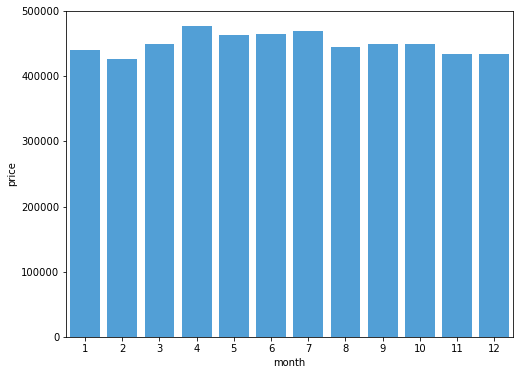

In [750]:
mean_month = pd.DataFrame(df_new.groupby('month')['price'].median())  # because price is skewed
base_color = sns.color_palette("husl", 9)[6]

fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x = mean_month.index, y= mean_month['price'], ax=ax, color = base_color);

In [751]:
# 0:winter, 1:spring, 2:summer, 3:fall
season = {1:'winter',2:'winter',3:'spring',4:'spring',5:'spring',
          6:'summer',7:'summer',8:'summer',9:'fall',10:'fall',11:'fall',12:'winter'}
df_new['season'] = df_new['month'].map(season)

In [752]:
df_new['season'].value_counts()

spring    6497
summer    6251
fall      4997
winter    3675
Name: season, dtype: int64

In [753]:
mean_season = pd.DataFrame(df_new.groupby('season')['price'].median()) # because price is skewed
mean_season

,price
season,
fall,445000.0
spring,465000.0
summer,458400.0
winter,432000.0


In [754]:
# Code copied from: https://stackoverflow.com/questions/61330427/set-y-axis-in-millions and modified a bit. 
# Use the function below to get rid of 1e8s etc on graphs and to format numbers in thousands, millions, etc in visualizations..:

from matplotlib.ticker import FuncFormatter

def human_format(num, pos):
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    return '$%.2f%s' % (num, ['', 'K', 'M', 'B', 'T', 'P'][magnitude])

formatter = FuncFormatter(human_format)

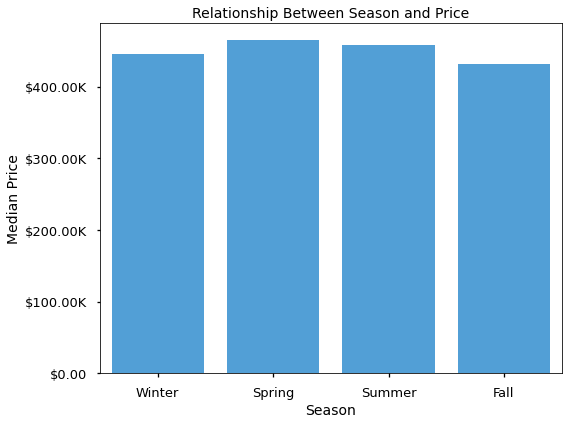

In [755]:
mean_season = pd.DataFrame(df_new.groupby('season')['price'].median())

with plt.style.context('seaborn-talk'):
    base_color = sns.color_palette("husl", 9)[6]
    fig, ax  = plt.subplots(figsize=(8, 6))
    sns.barplot(x = mean_season.index, y= mean_season['price'], ax=ax, color = base_color)
    ax.set_xticklabels(['Winter', 'Spring', 'Summer','Fall']);
    ax.yaxis.set_major_formatter(formatter)
    ax.set_title('Relationship Between Season and Price',fontsize=14)
    ax.set_xlabel("Season",fontsize=14)
    ax.set_ylabel("Median Price",fontsize=14)
    fig.tight_layout();

    fig.savefig('./images/Seasons.png', dpi=300);

# Price is higher for the spring season. Let's use this variable in the regression.

In [446]:
season_dummies = pd.get_dummies(df_new['season']).drop(['winter'], axis=1)
df_new = pd.concat([df_new, season_dummies], axis=1)
df_new = df_new.drop(['season', 'month'], axis=1)
df_new.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,fall,spring,summer
0,221900.0,3,1.00,1180,5650,1.0,0,1,3,5,...,1955,0.0,98178,47.5112,-122.257,1340,5650,1,0,0
1,538000.0,3,2.25,2570,7242,2.0,0,1,3,5,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,0,0,0
2,180000.0,2,1.00,770,10000,1.0,0,1,3,4,...,1933,0.0,98028,47.7379,-122.233,2720,8062,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,0,1,5,5,...,1965,0.0,98136,47.5208,-122.393,1360,5000,0,0,0
4,510000.0,3,2.00,1680,8080,1.0,0,1,3,8,...,1987,0.0,98074,47.6168,-122.045,1800,7503,0,0,0


- Let's create a new variable called `age` to represent the age of an house from the time it was built or renovated using `yr_built` and `yr_renovated`. 

In [447]:
# Because all houses were sold in 2014 and 2015 we will take 2015 as the current year. 

df_new['age'] = 2015 - df_new['yr_built'] # Set all age based on yr_built initially. 
mask = df_new['yr_renovated'] != 0
df.loc[mask, "age"] = 2015 - df_new['yr_renovated'] # Set age based on yr_renovation where the mask condition is true

-0.05101181180014423


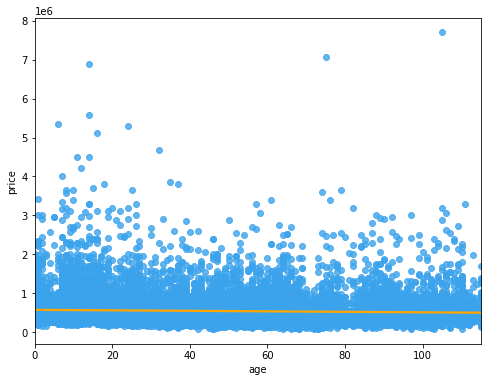

In [448]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.regplot(x="age", y="price", ax=ax, data=df_new, color = base_color, line_kws={"color": "orange"})
print(df_new.corr()['price']['age'])

# not much of a correlation but let's still keep this variable. 

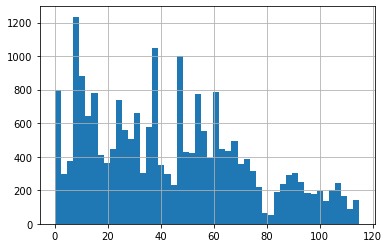

In [449]:
df_new['age'].hist(bins = 50); 

In [450]:
df_new['age'].isnull().sum()

0

Older than 30 considered old

In [451]:
df_new['age<30'] = df_new['age'] < 30
df_new['age<30'].value_counts()

False    13393
True      8027
Name: age<30, dtype: int64

In [452]:
dic = {False:"0", True:"1"}
df_new.replace({"age<30": dic}, inplace=True)
df_new["age<30"] = df_new["age<30"].astype(int)
df_new["age<30"].value_counts()

0    13393
1     8027
Name: age<30, dtype: int64

In [453]:
print(df_new.corr()['price']['age'])
print(df_new.corr()['price']['age<30']) # slight improvement

-0.05101181180014423
0.12041833256612325


In [454]:
df_new = df_new.drop(['yr_built', 'yr_renovated'], axis=1)

0.2549716328712806


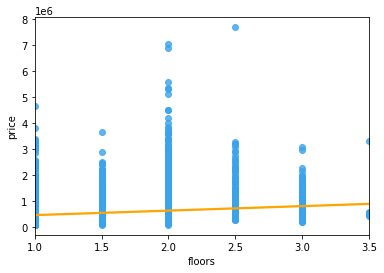

In [455]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.regplot(x="floors", y="price", ax=ax, data=df_new, color = base_color, line_kws={"color": "orange"})
print(df_new.corr()['price']['floors'])

### Check the distribution for the target / dependent variable:
- The sale prices have a negative skew, meaning the majority of the data is in the lower values, and there are fewer very high values. 
- Non-normality of the target variable is usually not a problem with linear regression, but we might still benefit from (log) transforming this variable later. 

In [456]:
# Code copied from: https://stackoverflow.com/questions/61330427/set-y-axis-in-millions and modified a bit. 
# Use the function below to get rid of 1e8s etc on graphs and to format numbers in thousands, millions, etc in visualizations..:

from matplotlib.ticker import FuncFormatter

def human_format(num, pos):
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    return '$%.0f%s' % (num, ['', 'K', 'M', 'B', 'T', 'P'][magnitude])

formatter = FuncFormatter(human_format)

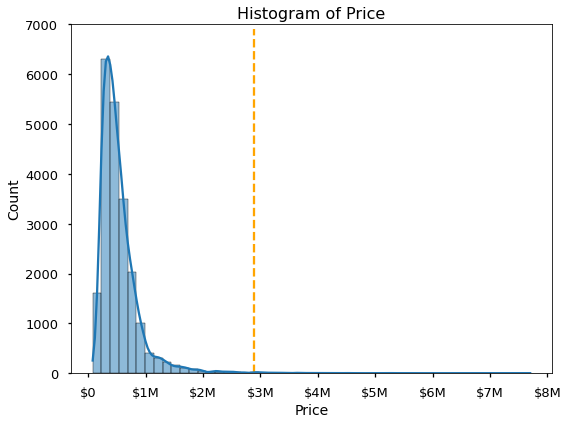

In [457]:
with plt.style.context('seaborn-talk'):
    fig, ax  = plt.subplots(figsize=(8, 6))

    sns.histplot(x = df_new['price'], bins=50, ax=ax, kde =True)
    ax.xaxis.set_major_formatter(formatter)
    plt.ylim(0, 7000)
    ax.set_title('Histogram of Price', fontsize=16)
    ax.set_xlabel("Price", fontsize=14)
    ax.set_ylabel("Count", fontsize=14)
    ax.vlines(df['price'].quantile(0.997), 0, 6900, color= 'orange', linestyle='--',)
    fig.tight_layout();
    
    fig.savefig('./images/Histogram_DependentMeasure.png', dpi=300)
   

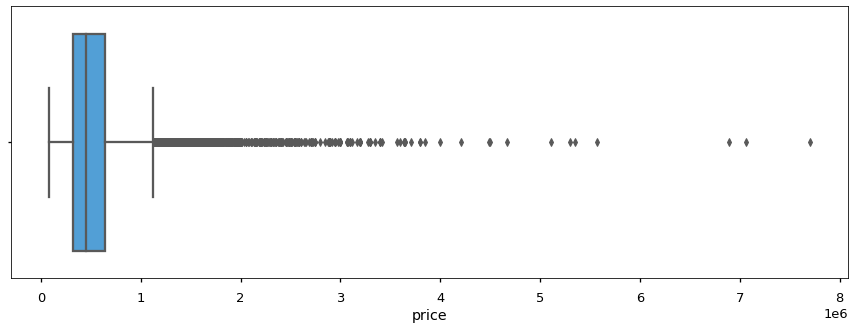

In [458]:
 with plt.style.context('seaborn-talk'):
    fig, ax  = plt.subplots(figsize=(15, 5))
    sns.boxplot(x = df_new['price'], ax=ax, color = base_color)

In [459]:
df_new.price.tail()

21415    360000.0
21416    400000.0
21417    402101.0
21418    400000.0
21419    325000.0
Name: price, dtype: float64

In [460]:
 # REMOVING THOSE 3 SD ABOVE THE MEAN
df_new = df_new[(df_new['price'] < df_new['price'].quantile(.997))]
df_new.shape

(21355, 22)

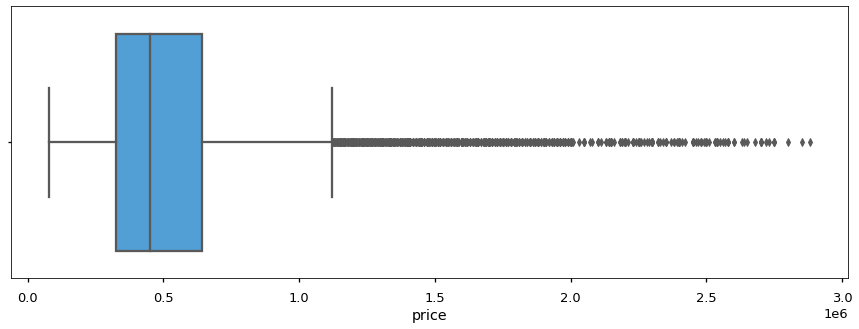

In [461]:
with plt.style.context('seaborn-talk'):
    fig, ax  = plt.subplots(figsize=(15, 5))
    sns.boxplot(x = df_new['price'], ax=ax, color = base_color)

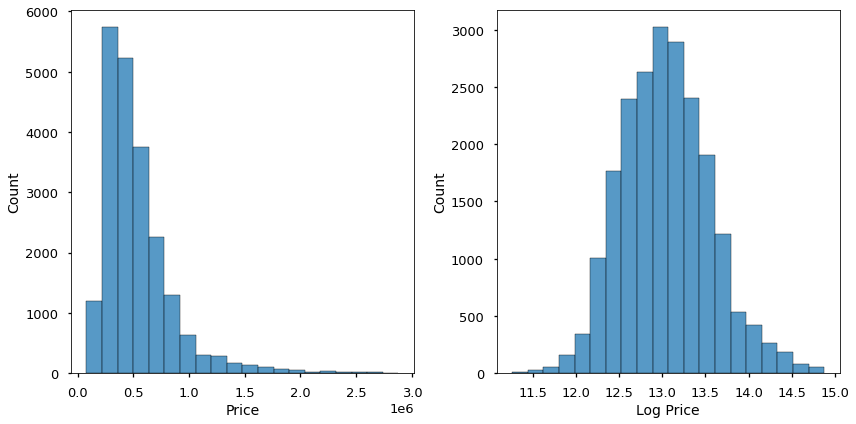

In [462]:
df_new['log_price'] = np.log(df_new['price'])

with plt.style.context('seaborn-talk'):

    fig, (ax1, ax2) = plt.subplots(ncols=2,  figsize=(12, 6))
    fig.set_tight_layout(True)

    sns.histplot(x = df_new['price'], ax= ax1, bins=20);
    sns.histplot(x = df_new['log_price'], ax= ax2, bins=20);

    ax1.set_xlabel("Price", fontsize=14)
    ax2.set_xlabel("Log Price", fontsize=14)
    ax1.set_ylabel("Count", fontsize=14)
    ax2.set_ylabel("Count", fontsize=14)

    fig.savefig('./images/price_before_after_log.png', dpi=300);

### Zipcodes:

- There are 70 Zipcodes! Too many levels if we go for One Hot Encoding.
- We cannot leave it as label encoded either, zip numbers do not have a meaninful numerical relationship to one another. 
- I will engineer a new "location" variable with more meaningful categorical distinctions using Longitude-Latitude - I will then dummy code this variable. 
- I will also engineer another zipcode variable by grouping zipcodes based on their mean price to come up with another meaningful categorical variable with smaller number of levels - I will then dummy code this variable as well. 


In [463]:
df_new.zipcode.value_counts()

98103    600
98038    586
98115    576
98052    571
98117    548
        ... 
98102    103
98010     99
98024     79
98148     56
98039     40
Name: zipcode, Length: 70, dtype: int64

In [464]:
zipmeans = df_new.groupby('zipcode')['price'].mean().sort_values(ascending=False)
zipmeans = pd.DataFrame(zipmeans).reset_index()
zipmeans

,zipcode,price
0,98039,1.761750e+06
1,98004,1.245386e+06
2,98040,1.129398e+06
3,98112,1.051826e+06
4,98006,8.418961e+05
...,...,...
65,98148,2.881123e+05
66,98001,2.822688e+05
67,98032,2.533173e+05
68,98168,2.424478e+05


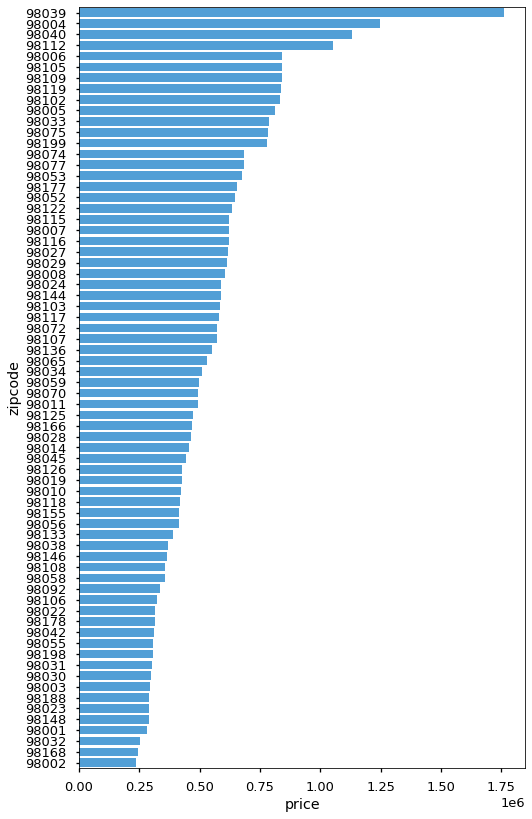

In [465]:
with plt.style.context('seaborn-talk'):
    base_color = sns.color_palette("husl", 9)[6]
    fig, ax  = plt.subplots(figsize=(8, 14))
    sns.barplot(x = zipmeans['price'], y= zipmeans['zipcode'],  
                order = zipmeans.sort_values('price',ascending = False).zipcode, ax=ax, color = base_color, orient = "h")


The most expensive 4 zipcodes: 
- Medina, Bellevue, Mercer Island and Seattle

In [466]:
# https://simplemaps.com/data/us-zips
    
dfzip = pd.read_csv("./data/uszips.csv")
dfzip.head()

,zip,lat,lng,city,state_id,state_name,zcta,parent_zcta,population,density,county_fips,county_name,county_weights,county_names_all,county_fips_all,imprecise,military,timezone
0,601,18.18027,-66.75266,Adjuntas,PR,Puerto Rico,True,NaN,16773.0,100.5,72001,Adjuntas,"{""72001"": 98.76, ""72141"": 1.24}",Adjuntas|Utuado,72001|72141,False,False,America/Puerto_Rico
1,602,18.36075,-67.17541,Aguada,PR,Puerto Rico,True,NaN,37083.0,472.1,72003,Aguada,"{""72003"": 100}",Aguada,72003,False,False,America/Puerto_Rico
2,603,18.45744,-67.12225,Aguadilla,PR,Puerto Rico,True,NaN,45652.0,513.2,72005,Aguadilla,"{""72005"": 99.76, ""72099"": 0.24}",Aguadilla|Moca,72005|72099,False,False,America/Puerto_Rico
3,606,18.16585,-66.93716,Maricao,PR,Puerto Rico,True,NaN,6231.0,54.3,72093,Maricao,"{""72093"": 82.28, ""72153"": 11.67, ""72121"": 6.05}",Maricao|Yauco|Sabana Grande,72093|72153|72121,False,False,America/Puerto_Rico
4,610,18.29110,-67.12243,Anasco,PR,Puerto Rico,True,NaN,26502.0,275.7,72011,Añasco,"{""72011"": 96.71, ""72099"": 2.81, ""72083"": 0.37,...",Añasco|Moca|Las Marías|Aguada,72011|72099|72083|72003,False,False,America/Puerto_Rico


In [467]:
dfzip = dfzip[(dfzip['county_names_all'].str.contains('King')) & (dfzip['state_id'] == 'WA') ]
print(dfzip.zip.nunique())
dfzip

89


,zip,lat,lng,city,state_id,state_name,zcta,parent_zcta,population,density,county_fips,county_name,county_weights,county_names_all,county_fips_all,imprecise,military,timezone
32938,98001,47.30919,-122.26426,Auburn,WA,Washington,True,NaN,34455.0,713.9,53033,King,"{""53033"": 100}",King,53033,False,False,America/Los_Angeles
32939,98002,47.30820,-122.21567,Auburn,WA,Washington,True,NaN,33947.0,1829.6,53033,King,"{""53033"": 100}",King,53033,False,False,America/Los_Angeles
32940,98003,47.30596,-122.31465,Federal Way,WA,Washington,True,NaN,49445.0,1659.9,53033,King,"{""53033"": 100}",King,53033,False,False,America/Los_Angeles
32941,98004,47.61865,-122.20548,Bellevue,WA,Washington,True,NaN,37265.0,1979.1,53033,King,"{""53033"": 100}",King,53033,False,False,America/Los_Angeles
32942,98005,47.61494,-122.16814,Bellevue,WA,Washington,True,NaN,21414.0,1126.7,53033,King,"{""53033"": 100}",King,53033,False,False,America/Los_Angeles
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33031,98199,47.65139,-122.40223,Seattle,WA,Washington,True,NaN,23444.0,2137.3,53033,King,"{""53033"": 100}",King,53033,False,False,America/Los_Angeles
33041,98224,47.73570,-121.56859,Baring,WA,Washington,True,NaN,243.0,1.5,53033,King,"{""53033"": 100}",King,53033,False,False,America/Los_Angeles
33092,98288,47.65204,-121.35740,Skykomish,WA,Washington,True,NaN,225.0,0.3,53033,King,"{""53033"": 100}",King,53033,False,False,America/Los_Angeles
33132,98354,47.25113,-122.31557,Milton,WA,Washington,True,NaN,7551.0,1029.0,53053,Pierce,"{""53053"": 80.02, ""53033"": 19.98}",Pierce|King,53053|53033,False,False,America/Los_Angeles


In [468]:
dfzip_table = dfzip.groupby('city')[['lat', 'lng']].mean()
dfzip_table = dfzip_table.reset_index()
dfzip_table

,city,lat,lng
0,Auburn,47.301967,-122.203720
1,Baring,47.735700,-121.568590
2,Bellevue,47.602148,-122.155832
3,Black Diamond,47.311730,-122.003260
4,Bothell,47.757360,-122.198710
5,Carnation,47.696640,-121.840240
6,Duvall,47.740830,-121.934940
7,Enumclaw,47.171400,-121.679580
8,Fall City,47.573010,-121.902190
9,Federal Way,47.307385,-122.338315


In [469]:
# For the purpose of graphing removing: Baring, Skykomish, Snoqualmie Pass
dfzip_table.drop(index=[1,27,29], axis=0, inplace=True)

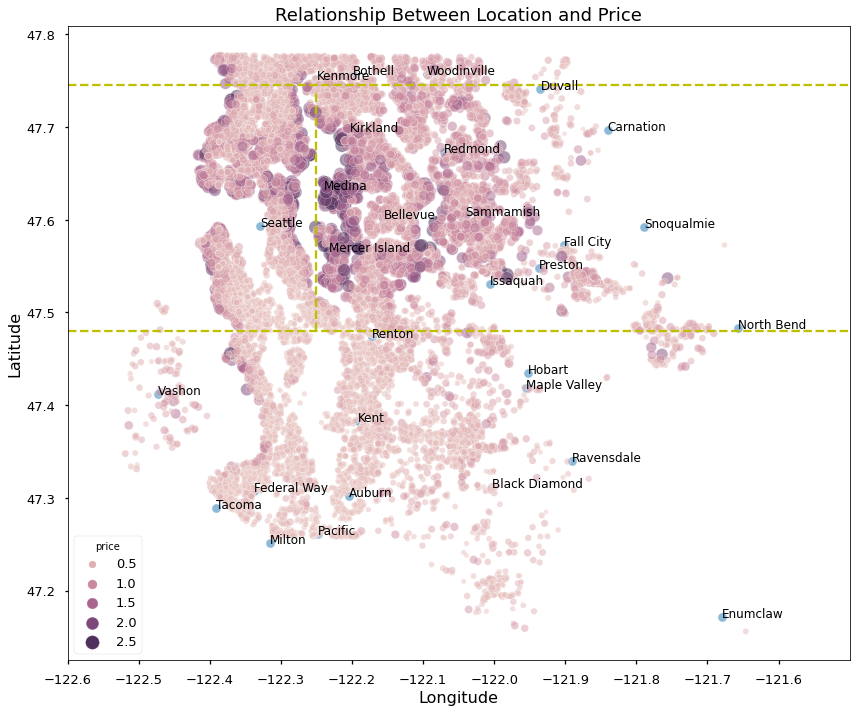

In [470]:
# Scatterplot of longitude and latitude with a hue of price, city names are superimposed to the map:
# Superimposed data is from: https://www.communitiescount.org/king-county-geographies
# The shape is the shape of King County, WA

with plt.style.context('seaborn-talk'):
    
    fig, ax = plt.subplots(figsize=(12, 10))
    sns.scatterplot(data=dfzip_table, x='lng', y='lat',  alpha = .5, ax=ax)
    [plt.text(x=row['lng'], y=row['lat'], s=row['city'], size='large', color='black') for k,row in dfzip_table.iterrows()]

    sns.scatterplot(data=df_new, x='long', y='lat', hue='price', size="price",sizes=(20, 200),  alpha = .5, ax=ax) 
    ax.axhline(y= 47.48, xmin=0, xmax=1, color='y', linestyle='--')
    ax.axvline(x= -122.25, ymin=0.52, ymax=0.9, color='y', linestyle='--')
    ax.axhline(y= 47.745, xmin=0, xmax=1, color='y', linestyle='--')
    plt.xticks(np.arange(-122.6, -121.5, 0.1))
    plt.xlim(-122.6, -121.5)
    ax.set_title('Relationship Between Location and Price',fontsize=18)
    ax.set_xlabel("Longitude",fontsize=16)
    ax.set_ylabel("Latitude",fontsize=16)
    fig.tight_layout();
    
    fig.savefig('./images/LocationMap.png', dpi=300);


#### Let's come up with a function to extract 4 regions based on coordinates: 
- North 
- East (Medina, Bellevue, Mercer Island and the east), 
- Seattle
- South


In [471]:
df_new['coordinates'] = list(zip(df_new.lat, df_new.long))

def region(coordinate):
    if (coordinate[0] > 47.745):
        return 'north'
    elif (coordinate[0] > 47.48) and (coordinate[0] < 47.745) and (coordinate[1] < -122.25):
        return 'seattle'
    elif (coordinate[0] > 47.48) and (coordinate[0] < 47.745) and (coordinate[1] > -122.25): 
        return 'east'
    else:
        return 'south'

region([47.5112, -122.257])

'seattle'

In [472]:
df_new['region'] = df_new['coordinates'].apply(region)
df_new.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_living15,sqft_lot15,fall,spring,summer,age,age<30,log_price,coordinates,region
0,221900.0,3,1.00,1180,5650,1.0,0,1,3,5,...,1340,5650,1,0,0,60,0,12.309982,"(47.5112, -122.257)",seattle
1,538000.0,3,2.25,2570,7242,2.0,0,1,3,5,...,1690,7639,0,0,0,64,0,13.195614,"(47.721, -122.319)",seattle
2,180000.0,2,1.00,770,10000,1.0,0,1,3,4,...,2720,8062,0,0,0,82,0,12.100712,"(47.7379, -122.233)",east
3,604000.0,4,3.00,1960,5000,1.0,0,1,5,5,...,1360,5000,0,0,0,50,0,13.311329,"(47.5208, -122.393)",seattle
4,510000.0,3,2.00,1680,8080,1.0,0,1,3,8,...,1800,7503,0,0,0,28,1,13.142166,"(47.6168, -122.045)",east


In [473]:
df_new.groupby('region')['price'].mean()

region
east       670662.107163
north      476747.356508
seattle    562772.372413
south      331425.681818
Name: price, dtype: float64

In [474]:
df_new['region'].value_counts()

seattle    7344
east       7120
south      5654
north      1237
Name: region, dtype: int64

- East appears as the most expensive area, followed by Seattle, North, and the South is the cheapest. 

In [475]:
# East region is the reference point
region_dummies = pd.get_dummies(df_new['region']).drop(['south'],axis=1)
df_new = pd.concat([df_new, region_dummies], axis=1)
df_new.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,spring,summer,age,age<30,log_price,coordinates,region,east,north,seattle
0,221900.0,3,1.00,1180,5650,1.0,0,1,3,5,...,0,0,60,0,12.309982,"(47.5112, -122.257)",seattle,0,0,1
1,538000.0,3,2.25,2570,7242,2.0,0,1,3,5,...,0,0,64,0,13.195614,"(47.721, -122.319)",seattle,0,0,1
2,180000.0,2,1.00,770,10000,1.0,0,1,3,4,...,0,0,82,0,12.100712,"(47.7379, -122.233)",east,1,0,0
3,604000.0,4,3.00,1960,5000,1.0,0,1,5,5,...,0,0,50,0,13.311329,"(47.5208, -122.393)",seattle,0,0,1
4,510000.0,3,2.00,1680,8080,1.0,0,1,3,8,...,0,0,28,1,13.142166,"(47.6168, -122.045)",east,1,0,0


In [476]:
df_new = df_new.drop(['region','coordinates', 'zipcode'], axis=1)

## FEATURE ENGINEERING CONTINUED

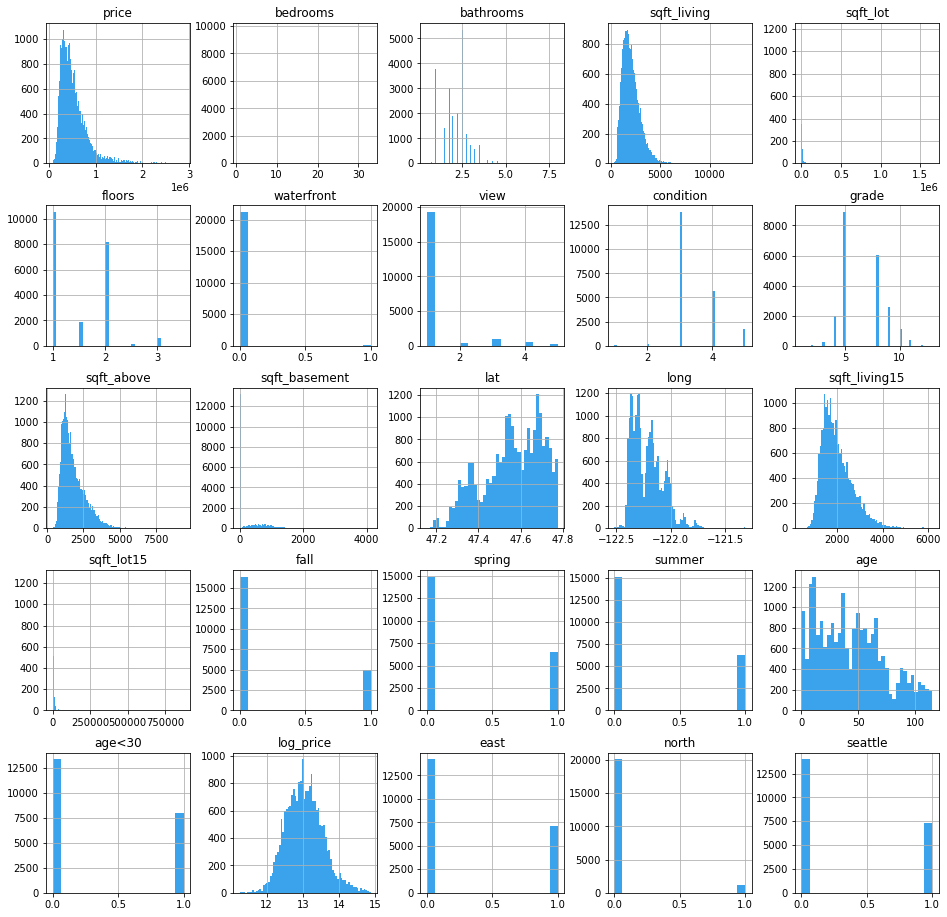

In [477]:
df_new.hist(bins='auto', edgecolor='none', color = base_color, figsize=(16,16));

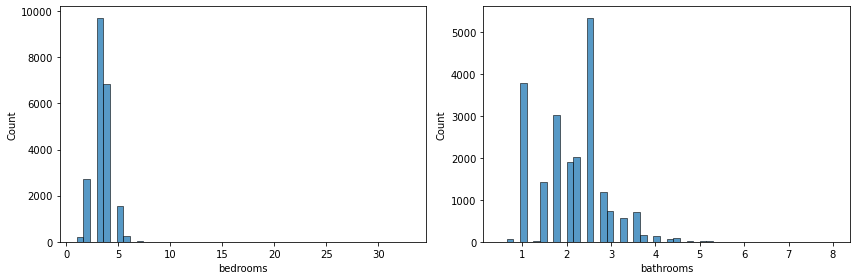

In [478]:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))
fig.set_tight_layout(True)

sns.histplot(x = df_new['bedrooms'], ax= ax1, bins=50);
sns.histplot(x = df_new['bathrooms'], ax =ax2, bins=50);  

# There are outliers in both bathrooms and bedrooms.

In [479]:
# Let's remove some very high values visible in the histograms:
df_new =  df_new[df_new['bedrooms'] < df_new['bedrooms'].quantile(.997)]
df_new =  df_new[df_new['bathrooms'] < df_new['bathrooms'].quantile(.997)]

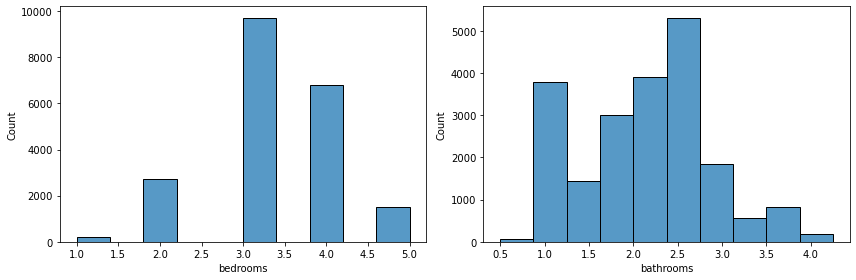

In [480]:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))
fig.set_tight_layout(True)

sns.histplot(x = df_new['bedrooms'], ax= ax1, bins=10);
sns.histplot(x = df_new['bathrooms'], ax =ax2, bins=10);  

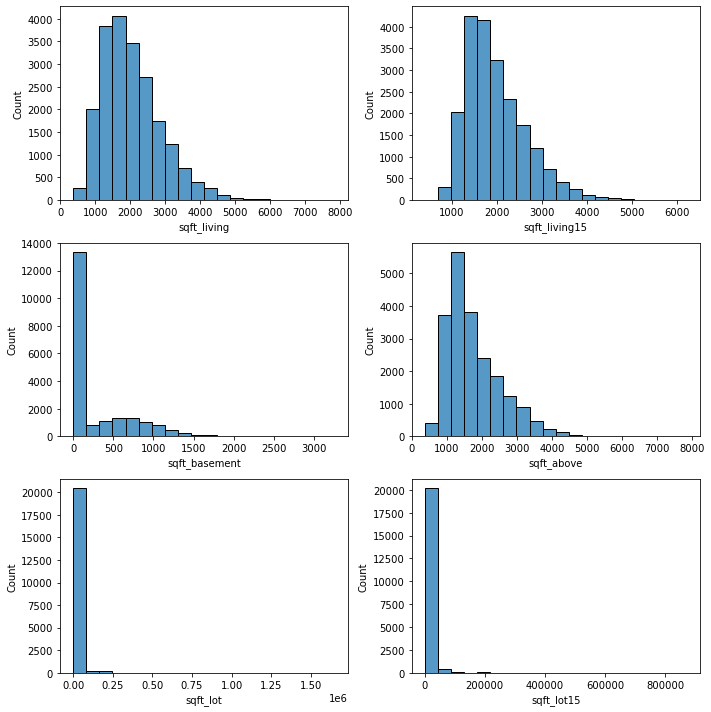

In [481]:
fig, ((ax1, ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(ncols=2, nrows=3, figsize=(10, 10))
fig.set_tight_layout(True)

sns.histplot(x = df_new['sqft_living'], ax= ax1, bins=20);
sns.histplot(x = df_new['sqft_living15'], ax= ax2, bins=20);
sns.histplot(x = df_new['sqft_basement'], ax =ax3, bins=20); 
sns.histplot(x = df_new['sqft_above'], ax= ax4, bins=20);
sns.histplot(x = df_new['sqft_lot'], ax =ax5, bins=20); 
sns.histplot(x = df_new['sqft_lot15'], ax= ax6, bins=20);

In [482]:
# Remove some very high values from sqft_lot and sqft_lot15
df_new =  df_new[df_new['sqft_lot'] < df_new['sqft_lot'].quantile(.997)]
df_new =  df_new[df_new['sqft_lot15'] < df_new['sqft_lot15'].quantile(.997)]

# What to do if log transform is not working?  INF

In [713]:
for var in ['sqft_living','sqft_living15','sqft_above','sqft_lot','sqft_lot15']: # 'sqft_basement' could not be log transformed
    df_new[f"log_"+var] = np.log(df_new[var])  # df_new[f"log{var}"] = np.log(df_new[var])


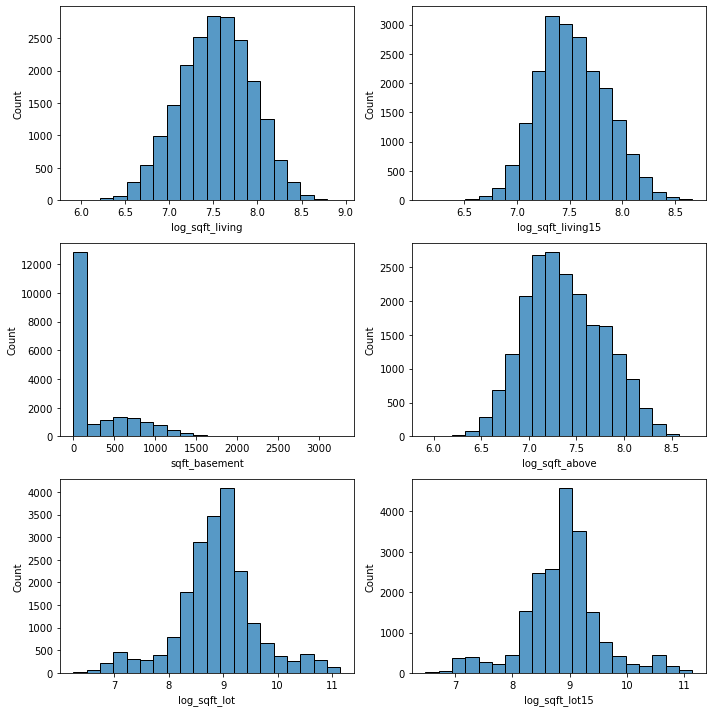

In [714]:
fig, ((ax1, ax2),(ax3, ax4),(ax5,ax6)) = plt.subplots(ncols=2, nrows=3, figsize=(10, 10))
fig.set_tight_layout(True)

sns.histplot(x = df_new['log_sqft_living'], ax= ax1, bins=20);
sns.histplot(x = df_new['log_sqft_living15'], ax= ax2, bins=20);
sns.histplot(x = df_new['sqft_basement'], ax= ax3, bins=20);
sns.histplot(x = df_new['log_sqft_above'], ax= ax4, bins=20);
sns.histplot(x = df_new['log_sqft_lot'], ax =ax5, bins=20); 
sns.histplot(x = df_new['log_sqft_lot15'], ax= ax6, bins=20);

In [497]:
# In case we use nontransformed values let's just remove the highest outliers:
# for var in ['sqft_living','sqft_basement','sqft_living15','sqft_above']:
#    df_new = df_new[(df_new[var] < df_new[var].quantile(.997))]

df_new = df_new[(df_new['sqft_lot'] < 70000)]
df_new = df_new[(df_new['sqft_lot15'] < 70000)]


In [498]:
df_new.shape

(20239, 30)

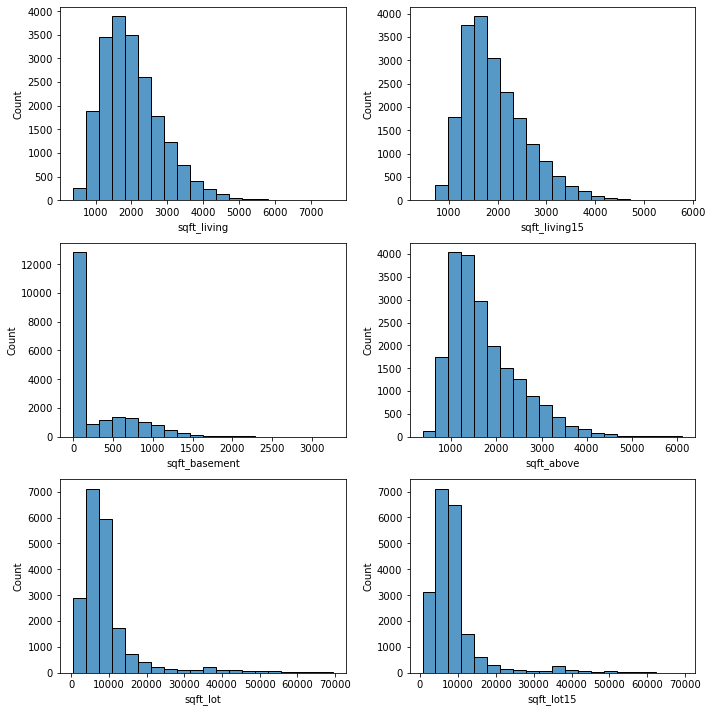

In [499]:
fig, ((ax1, ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(ncols=2, nrows=3, figsize=(10, 10))
fig.set_tight_layout(True)

sns.histplot(x = df_new['sqft_living'], ax= ax1, bins=20);
sns.histplot(x = df_new['sqft_living15'], ax= ax2, bins=20);
sns.histplot(x = df_new['sqft_basement'], ax =ax3, bins=20); 
sns.histplot(x = df_new['sqft_above'], ax= ax4, bins=20);
sns.histplot(x = df_new['sqft_lot'], ax =ax5, bins=20); 
sns.histplot(x = df_new['sqft_lot15'], ax= ax6, bins=20);

### FEATURE SELECTION

In [699]:
data = df_new.copy()
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,age<30,log_price,east,north,seattle,log_sqft_living,log_sqft_living15,log_sqft_above,log_sqft_lot,log_sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,1,3,5,...,0,12.309982,0,0,1,7.073270,7.200425,7.073270,8.639411,8.639411
1,538000.0,3,2.25,2570,7242,2.0,0,1,3,5,...,0,13.195614,0,0,1,7.851661,7.432484,7.682482,8.887653,8.941022
2,180000.0,2,1.00,770,10000,1.0,0,1,3,4,...,0,12.100712,1,0,0,6.646391,7.908387,6.646391,9.210340,8.994917
3,604000.0,4,3.00,1960,5000,1.0,0,1,5,5,...,0,13.311329,0,0,1,7.580700,7.215240,6.956545,8.517193,8.517193
4,510000.0,3,2.00,1680,8080,1.0,0,1,3,8,...,1,13.142166,1,0,0,7.426549,7.495542,7.426549,8.997147,8.923058


In [700]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'fall',
       'spring', 'summer', 'age', 'age<30', 'log_price', 'east', 'north',
       'seattle', 'log_sqft_living', 'log_sqft_living15', 'log_sqft_above',
       'log_sqft_lot', 'log_sqft_lot15'],
      dtype='object')

### HEATMAP


# .7 cutoff???

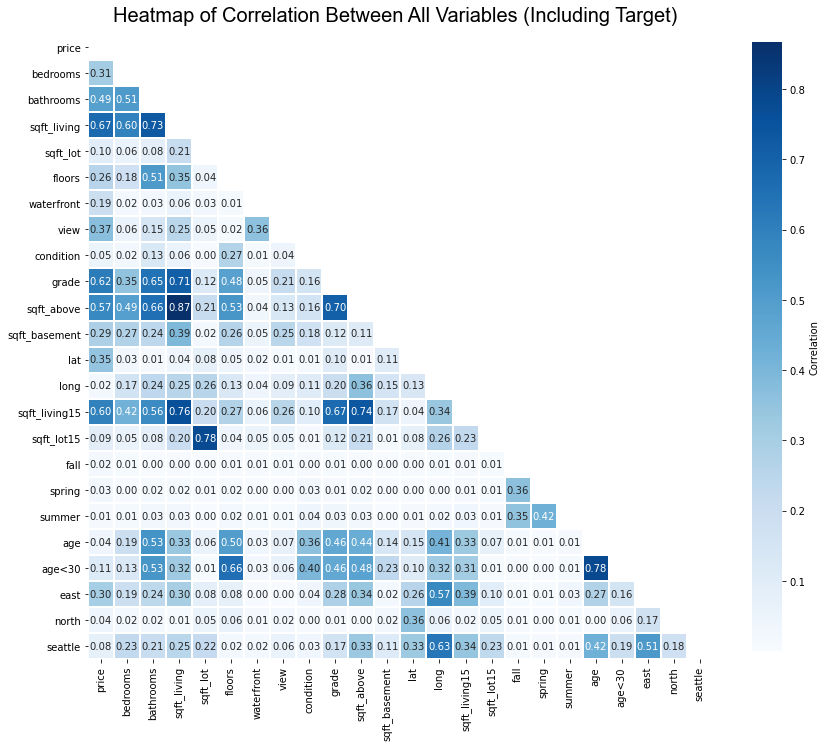

In [488]:
variables = data[['price','bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'fall',
       'spring', 'summer', 'age', 'age<30', 'east', 'north', 'seattle']]

corr = variables.corr().abs()

fig, ax=plt.subplots(figsize=(14,14))
matrix = np.triu(corr) # Getting the Upper Triangle of the correlation matrix
cbar_kws={"label": "Correlation", "shrink":0.8}
heatmap = sns.heatmap(data = corr, cmap='Blues', linewidths = 1, square= True,  ax=ax, annot=True, mask=matrix, fmt= ".2f", cbar_kws=cbar_kws) 
fig.suptitle('Heatmap of Correlation Between All Variables (Including Target)', fontsize=20, y=.84, x = .43, fontname='Arial');
heatmap;
# fig.savefig('./images/Boxplots_DependentMeasures.png', dpi=300);


In [489]:
def show_corr_pairs(data):
    corrs = variables.corr().abs().stack().reset_index().sort_values(0, ascending=False) #0 is the column automatically generated by the stacking
    corrs = pd.DataFrame(corrs)
    corrs =  corrs.rename(columns = {'level_0': 'var1', 'level_1': 'var2', 0:'corrcoef'})
    return corrs[(corrs['corrcoef']>.7) & (corrs['corrcoef']<1)]
show_corr_pairs(variables)

,var1,var2,corrcoef
243,sqft_above,sqft_living,0.866976
82,sqft_living,sqft_above,0.866976
476,age,age<30,0.783674
499,age<30,age,0.783674
364,sqft_lot15,sqft_lot,0.781327
111,sqft_lot,sqft_lot15,0.781327
339,sqft_living15,sqft_living,0.764524
86,sqft_living,sqft_living15,0.764524
254,sqft_above,sqft_living15,0.735849
346,sqft_living15,sqft_above,0.735849


In [490]:
variables.corr()['price'].map(abs).sort_values(ascending=False) 
# sqft_living seems to have the greatest correlation

price            1.000000
sqft_living      0.674967
grade            0.615615
sqft_living15    0.596724
sqft_above       0.574185
bathrooms        0.489374
view             0.372014
lat              0.347413
bedrooms         0.310928
east             0.304674
sqft_basement    0.285655
floors           0.260373
waterfront       0.190539
age<30           0.112333
sqft_lot         0.096389
sqft_lot15       0.091884
seattle          0.075470
condition        0.047466
north            0.042100
age              0.040963
spring           0.028555
long             0.021922
fall             0.020989
summer           0.013277
Name: price, dtype: float64

In [491]:
# We decided to use the absolute value of 0.7 as a cut-off for high correlation.
df_corr = abs(variables.corr()) > 0.7
df_corr.sum()
# Square Foot Living is the variable with the greatest collinearity to others too.

price            1
bedrooms         1
bathrooms        2
sqft_living      5
sqft_lot         2
floors           1
waterfront       1
view             1
condition        1
grade            3
sqft_above       4
sqft_basement    1
lat              1
long             1
sqft_living15    3
sqft_lot15       2
fall             1
spring           1
summer           1
age              2
age<30           2
east             1
north            1
seattle          1
dtype: int64

###  Take away from the Heat Map
- `sqft_living`, `sqft_above` ,`sqft_living15` ALSO `bathrooms` correlate highly. Keep `sqft_living` as it correlates with price the highest. 
- `grade` also correlates highly with `sqft_living`. We might remove `grade` as well. 
- remove `lat` and `long` (redundant with `south`).
- remove `age` (redundant with `age bins`).
- `sqft_lot15`and `sqft_lot` correlate highly. Keep `sqft_lot` as it correlates with price a bit more.

#### Which "area" measures to include in the model?

-  Let's pick `sqft_living` and `sqft_lot` as the two meaningful area measures. 
- `sqft_living` correlates highly with `sqft_above`, `sqft_basement` and `sqft_living15` as well as `bedrooms` and `bathrooms`.
- `sqft_lot` correlates highly with `sqft_lot15`.

## Check for linearity of all variables one time:

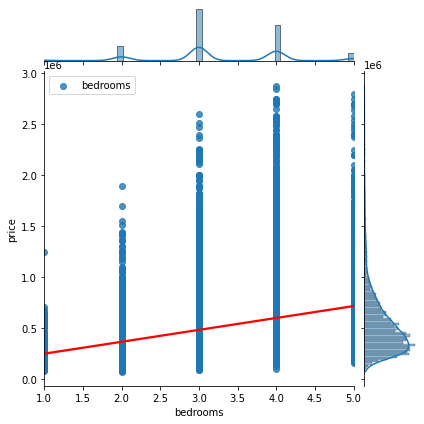

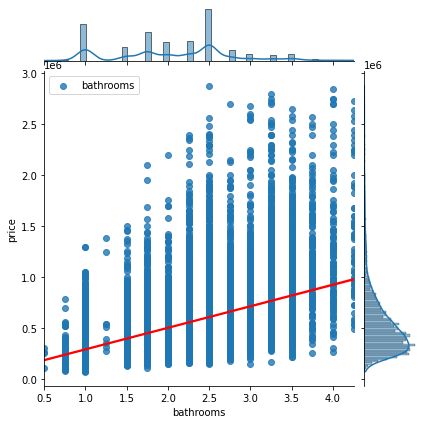

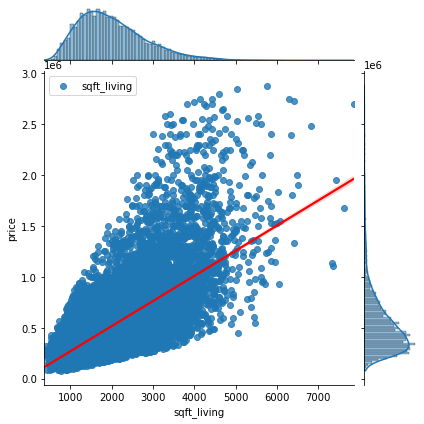

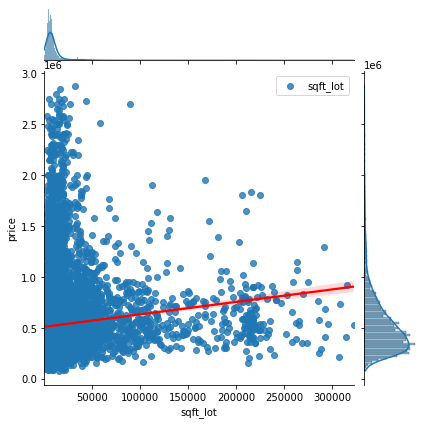

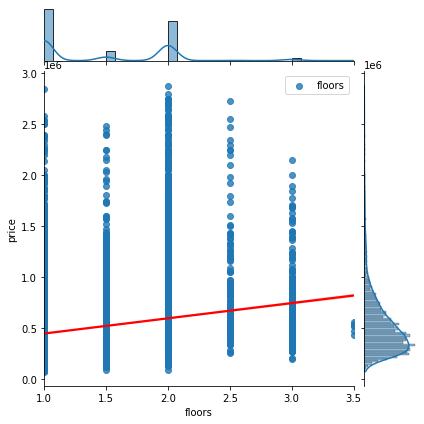

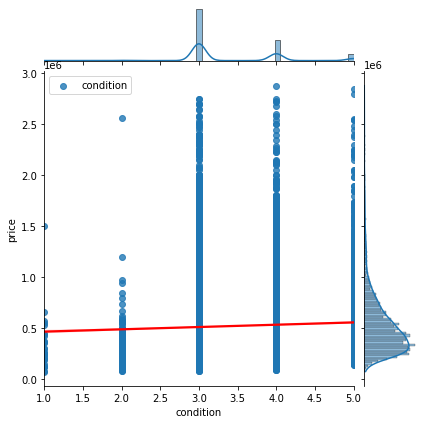

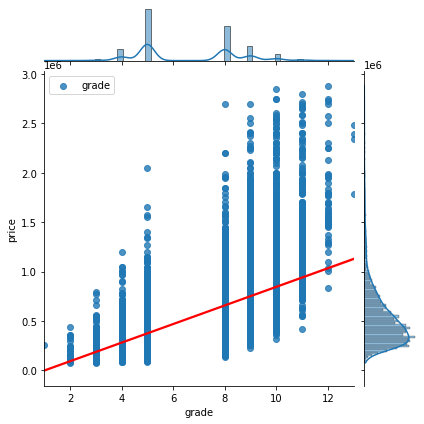

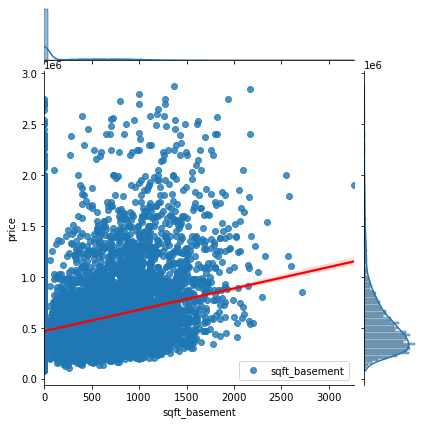

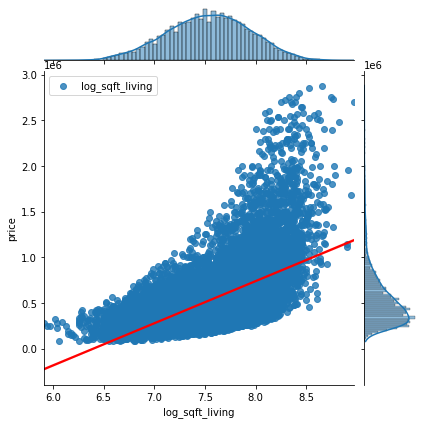

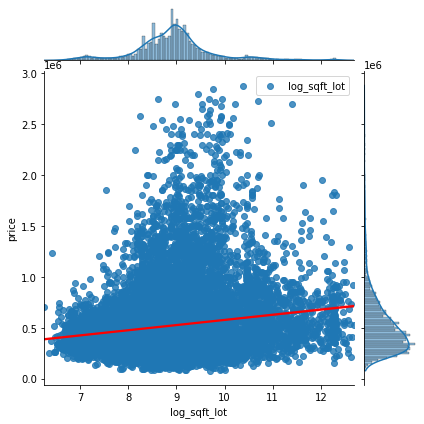

In [492]:
continuous = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
              'condition', 'grade', 'sqft_basement', 'log_sqft_living', 'log_sqft_lot']

for column in continuous:
    sns.jointplot(x=column, y="price", data=data, kind='reg', label=column,joint_kws={'line_kws':{'color':'red'}})
    plt.legend()
    plt.show()

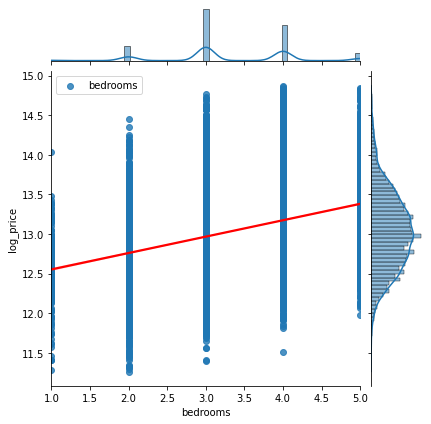

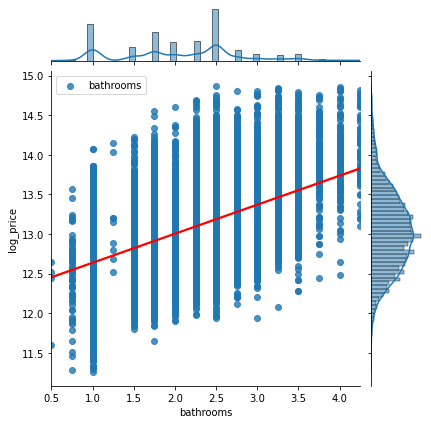

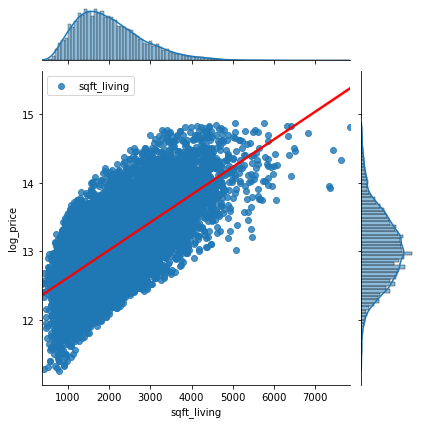

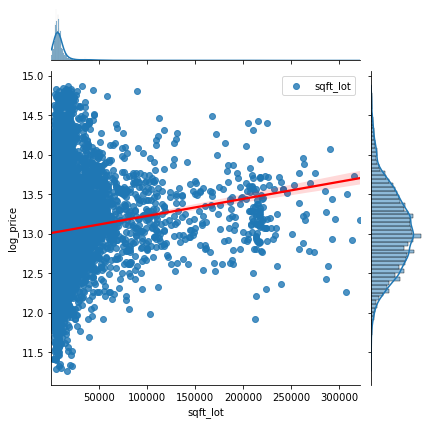

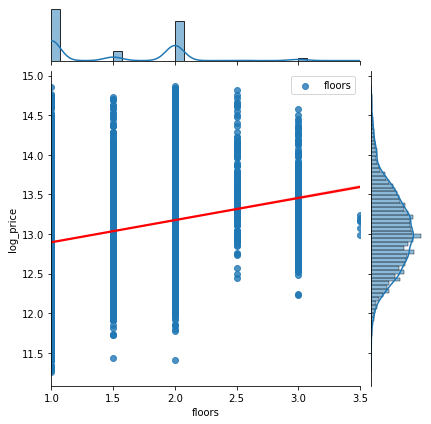

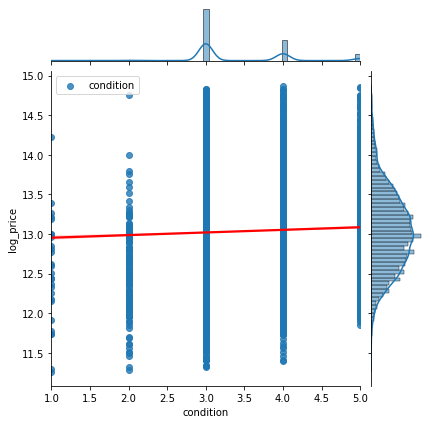

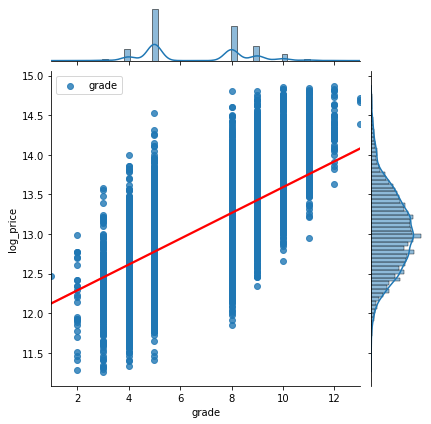

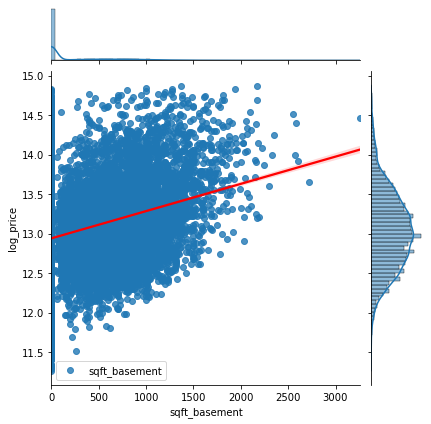

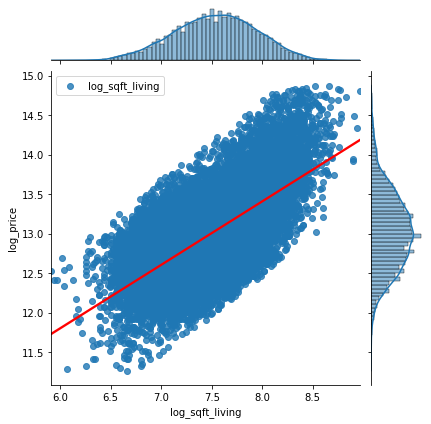

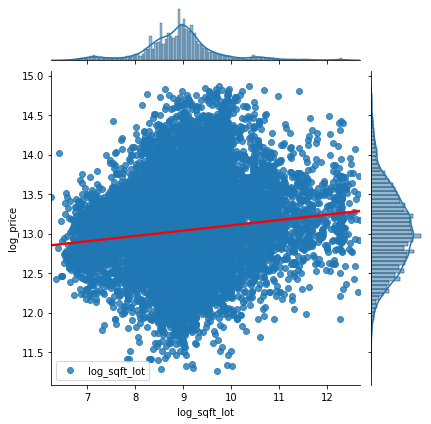

In [493]:
continuous = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
              'condition', 'grade', 'sqft_basement', 'log_sqft_living', 'log_sqft_lot']

for column in continuous:
    sns.jointplot(x=column, y="log_price", data=data, kind='reg', label=column,joint_kws={'line_kws':{'color':'red'}})
    plt.legend()
    plt.show()

## BASELINE MODEL #1

- The baseline model is using the most highly correlated variable with price: `sqft_living`

0.7012948591175883


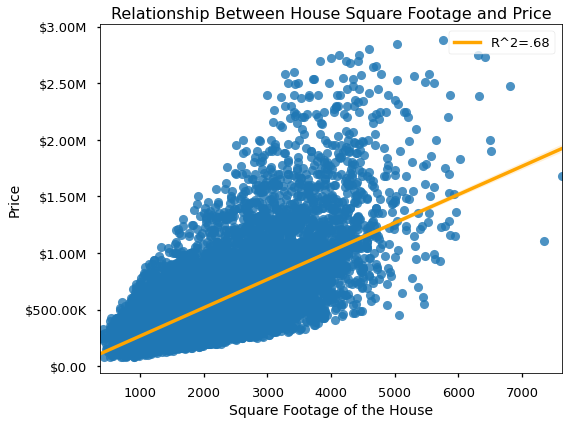

In [756]:
with plt.style.context('seaborn-talk'):
    fig, ax = plt.subplots(figsize=(8, 6))

    sns.regplot(x="sqft_living", y="price", ax=ax, data=data, line_kws={"color": "orange","label":"R^2=.68"})
    ax.legend()
    print(df_new.corr()['price']['sqft_living'])
    ax.yaxis.set_major_formatter(formatter)
    ax.set_title('Relationship Between House Square Footage and Price',fontsize=16)
    ax.set_xlabel("Square Footage of the House",fontsize=14)
    ax.set_ylabel("Price",fontsize=14)
    fig.tight_layout();
    fig.savefig('./images/Sqrt_living_Price.png', dpi=300);

In [757]:
y = data['price']
X = data['sqft_living']

X.shape, y.shape

((20239,), (20239,))

In [758]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                 1.662e+04
Date:                Wed, 17 Aug 2022   Prob (F-statistic):               0.00
Time:                        21:28:50   Log-Likelihood:            -2.7845e+05
No. Observations:               20239   AIC:                         5.569e+05
Df Residuals:                   20237   BIC:                         5.569e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.644e+04   4230.395      3.886      0.000    8145.386    2.47e+04
sqft_living   250.0733      1.940    128.927      0.000     246.271     253.875
==============================================================================
Omnibus:                     8034.450   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            56358.683
Skew:                           1.749   Prob(JB):                         0.00
Kurtosis:                      10.389   Cond. No.                     5.74e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.74e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Check for Normality and Homoscadecity:

In [503]:
def normality_homoscadecity(model):
    fig, ((ax1, ax2, ax3)) = plt.subplots(ncols=3,  figsize=(16, 4))
    
    ax1.hist(model.resid_pearson,bins=20,edgecolor='k')
    ax1.set_xlabel("Normalized residuals",fontsize=14)
    ax1.set_ylabel("Count",fontsize=14)
    ax1.set_title("Histogram of normalized residuals (NORMALITY)", fontsize =14)

    from statsmodels.graphics.gofplots import qqplot
    qqplot(model.resid_pearson, line='45', fit='True', ax = ax2, alpha=0.8, markerfacecolor='#1f77b4')
    ax2.set_xlabel("Theoretical quantiles",fontsize=14)
    ax2.set_ylabel("Ordered Values",fontsize=14)
    ax2.set_title("Q-Q plot of normalized residuals (NORMALITY)", fontsize =14)
    
    ax3.scatter(x=model.fittedvalues, y=model.resid)
    xmin=min(model.fittedvalues)
    xmax = max(model.fittedvalues)
    plt.hlines(y=0,xmin=xmin,xmax=xmax,color='red',linestyle='--',lw=3)
    ax3.set_xlabel("Fitted values",fontsize=14)
    ax3.set_ylabel("Residuals",fontsize=14)
    ax3.set_title("Fitted vs. residuals plot (HOMOSCADECITY)", fontsize =14)
    plt.grid(True)
    
    return(ax)

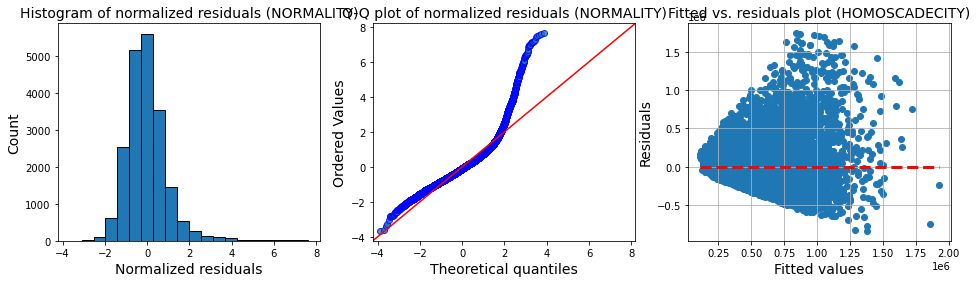

In [504]:
normality_homoscadecity(model);

-  The Distribution of the rediduals are NOT normal. The scatter plot are the observed data while the regression line is the prediction. The residuals are NOT normally distributed as the blue dots are not falling on the red line on the second graph. We may fix this by a transforming targte variables and/or features, or by removing outliers. 
- There seems like a violation of Homoskedasticity as well since the dots around the red line are not symmetric and follow a cone-like shape. We can try log transforming the target variable. 

## MODEL #2
- Using log transformed `log_price` as the target variable.

In [505]:
y = data['log_price']
X = data['sqft_living']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                 1.653e+04
Date:                Wed, 17 Aug 2022   Prob (F-statistic):               0.00
Time:                        11:38:56   Log-Likelihood:                -8853.6
No. Observations:               20239   AIC:                         1.771e+04
Df Residuals:                   20237   BIC:                         1.773e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.2036      0.007   1758.817      0.000      12.190      12.217
sqft_living     0.0004   3.18e-06    128.553      0.000       0.000       0.000
==============================================================================
Omnibus:                       82.303   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.427
Skew:                           0.058   Prob(JB):                     6.21e-15
Kurtosis:                       2.747   Cond. No.                     5.74e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.74e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

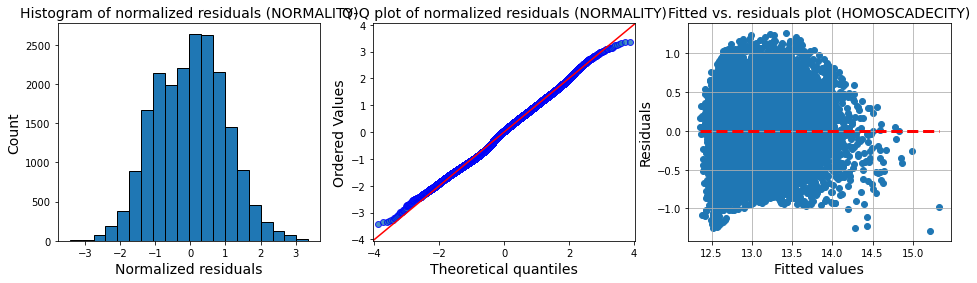

In [506]:
normality_homoscadecity(model);

## MODEL #3
- Using log transformed `log_sqft_living` as the predictor variable.

In [507]:
y = data['log_price']
X = data['log_sqft_living']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                 1.484e+04
Date:                Wed, 17 Aug 2022   Prob (F-statistic):               0.00
Time:                        11:39:10   Log-Likelihood:                -9328.4
No. Observations:               20239   AIC:                         1.866e+04
Df Residuals:                   20237   BIC:                         1.868e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               6.9814      0.050    140.433      0.000       6.884       7.079
log_sqft_living     0.8033      0.007    121.824      0.000       0.790       0.816
==============================================================================
Omnibus:                      151.965   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              118.827
Skew:                           0.106   Prob(JB):                     1.57e-26
Kurtosis:                       2.690   Cond. No.                         141.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

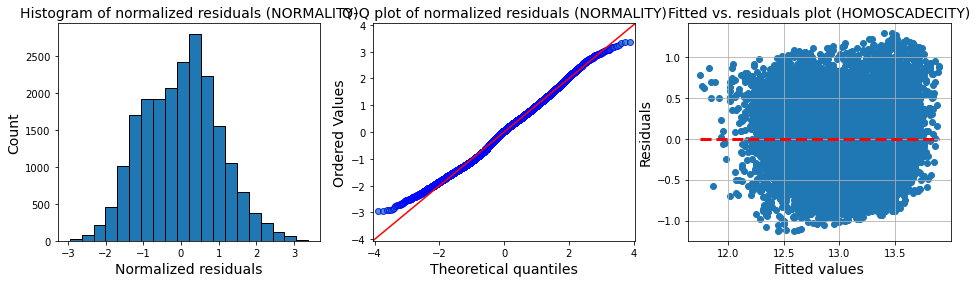

In [109]:
normality_homoscadecity(model);

- This was worse in terms of R2 and normality. 

In [508]:
variables.corr()['price'].map(abs).sort_values(ascending=False) 

price            1.000000
sqft_living      0.674967
grade            0.615615
sqft_living15    0.596724
sqft_above       0.574185
bathrooms        0.489374
view             0.372014
lat              0.347413
bedrooms         0.310928
east             0.304674
sqft_basement    0.285655
floors           0.260373
waterfront       0.190539
age<30           0.112333
sqft_lot         0.096389
sqft_lot15       0.091884
seattle          0.075470
condition        0.047466
north            0.042100
age              0.040963
spring           0.028555
long             0.021922
fall             0.020989
summer           0.013277
Name: price, dtype: float64

## MODEL #4
- Using `sqft_living` and `sqft_lot`

0.14225870225462084


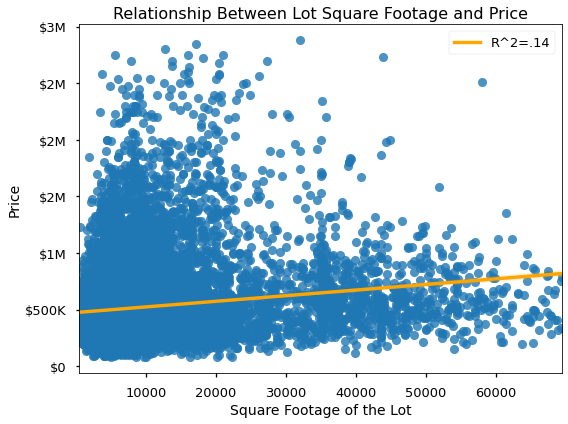

In [510]:
with plt.style.context('seaborn-talk'):
    fig, ax = plt.subplots(figsize=(8, 6))

    sns.regplot(x="sqft_lot", y="price", ax=ax, data=data, line_kws={"color": "orange","label":"R^2=.14"})
    ax.legend()
    print(df_new.corr()['price']['sqft_lot'])
    ax.yaxis.set_major_formatter(formatter)
    ax.set_title('Relationship Between Lot Square Footage and Price',fontsize=16)
    ax.set_xlabel("Square Footage of the Lot",fontsize=14)
    ax.set_ylabel("Price",fontsize=14)
    fig.tight_layout();
    fig.savefig('./images/Sqrt_lot_Price.png', dpi=300);


0.28103023990936765


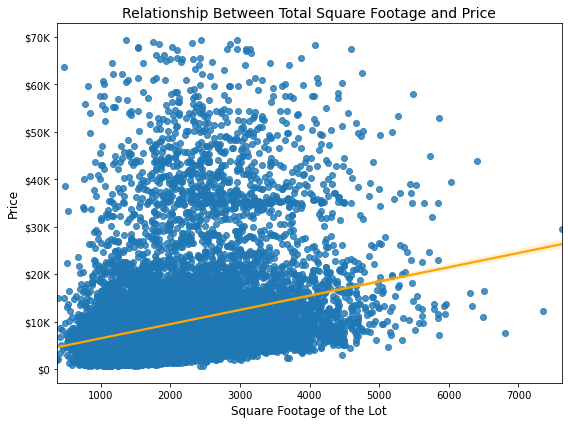

In [511]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.regplot(x="sqft_living", y="sqft_lot", ax=ax, data=data, line_kws={"color": "orange","label":"R^2=.28"})
print(df_new.corr()['sqft_lot']['sqft_living'])
ax.yaxis.set_major_formatter(formatter)
ax.set_title('Relationship Between Total Square Footage and Price',fontsize=14)
ax.set_xlabel("Square Footage of the Lot",fontsize=12)
ax.set_ylabel("Price",fontsize=12)
fig.tight_layout();

In [549]:
y = data['log_price']
X = data[['sqft_living', 'sqft_lot']]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     8396.
Date:                Wed, 17 Aug 2022   Prob (F-statistic):               0.00
Time:                        11:51:58   Log-Likelihood:                -8780.6
No. Observations:               20239   AIC:                         1.757e+04
Df Residuals:                   20236   BIC:                         1.759e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.2165      0.007   1746.235      0.000      12.203      12.230
sqft_living     0.0004    3.3e-06    127.217      0.000       0.000       0.000
sqft_lot    -3.747e-06    3.1e-07    -12.106      0.000   -4.35e-06   -3.14e-06
==============================================================================
Omnibus:                       64.571   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.429
Skew:                           0.049   Prob(JB):                     4.12e-12
Kurtosis:                       2.771   Cond. No.                     3.49e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

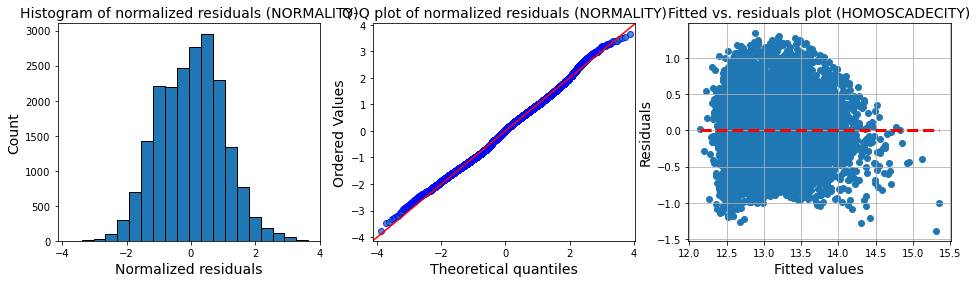

In [516]:
normality_homoscadecity(model);

## Check for Multicollinearity:

In [517]:
#https://github.com/cwf231/linear_regression_guided_practice
from statsmodels.stats.outliers_influence import variance_inflation_factor

def create_vif_dictionary(X):
    vif_dct = {}
    for i in range(len(X.columns)): # Loop through each row and set the variable name to the VIF. 
        vif = variance_inflation_factor(X.values, i) # Calculate VIF
        v = X.columns[i] # Extract column name for dictionary key.
        vif_dct[v] = vif # Set value in dictionary.
    return vif_dct

def multicollinearity(X):
    multicollinearity = pd.DataFrame(create_vif_dictionary(X), index=[0]).T
    return multicollinearity.sort_values(by = 0, ascending =False).apply(lambda x: x.apply('{0:.4f}'.format))

In [518]:
multicollinearity(X)

,0
const,149.8730
sqft_living,1.1208
log_sqft_lot,1.1208


## MODEL #5
- Adding other related variables except age, season and location

In [613]:
variables = ['sqft_living', 'sqft_lot', 'condition', 'grade'] 

y = data['log_price']
X = data[variables]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.rsquared

0.5304644299857538

In [614]:
variables = ['sqft_living', 'sqft_lot', 'condition', 'grade',  'view' ,'waterfront'] 

y = data['log_price']
X = data[variables]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.rsquared

0.5526709861493905

In [616]:
variables = ['sqft_living', 'sqft_lot', 'condition', 'grade',   'view' ,'waterfront', 
             'bedrooms', 'bathrooms'] 

y = data['log_price']
X = data[variables]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.rsquared

0.5550638279245305

In [622]:
variables = ['sqft_living', 'sqft_lot', 'condition', 'grade',   'view' ,'waterfront', 
             'bedrooms','bathrooms','sqft_basement', 'floors'] 

y = data['log_price']
X = data[variables]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.rsquared)
model.summary()

0.5575834360846892


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     2549.
Date:                Wed, 17 Aug 2022   Prob (F-statistic):               0.00
Time:                        19:39:49   Log-Likelihood:                -6642.2
No. Observations:               20239   AIC:                         1.331e+04
Df Residuals:                   20228   BIC:                         1.339e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            11.6050      0.019    604.179      0.000      11.567      11.643
sqft_living       0.0003   5.82e-06     44.001      0.000       0.000       0.000
sqft_lot      -3.462e-06   2.93e-07    -11.816      0.000   -4.04e-06   -2.89e-06
condition         0.0942      0.004     24.634      0.000       0.087       0.102
grade             0.0933      0.002     50.654      0.000       0.090       0.097
view              0.0794      0.004     21.490      0.000       0.072       0.087
waterfront        0.3393      0.035      9.671      0.000       0.271       0.408
bedrooms         -0.0347      0.004     -9.336      0.000      -0.042      -0.027
bathrooms        -0.0251      0.006     -4.547      0.000      -0.036      -0.014
sqft_basement  7.888e-05    7.4e-06     10.653      0.000    6.44e-05    9.34e-05
floors            0.0365      0.006      5.895      0.000       0.024       0.049
==============================================================================
Omnibus:                        2.739   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.254   Jarque-Bera (JB):                2.751
Skew:                           0.022   Prob(JB):                        0.253
Kurtosis:                       2.964   Cond. No.                     1.95e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.95e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

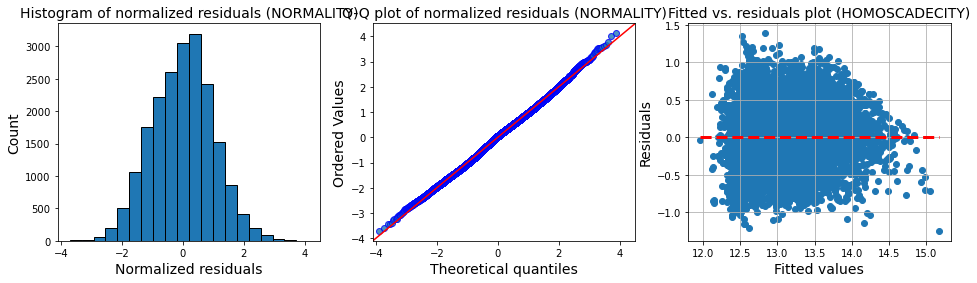

In [623]:
normality_homoscadecity(model);

In [624]:
multicollinearity(X)

,0
const,66.1193
sqft_living,4.1577
bathrooms,2.7715
grade,2.4579
floors,2.0134
sqft_basement,1.7182
bedrooms,1.6834
view,1.2976
sqft_lot,1.2013
waterfront,1.1600


## MODEL #6
- Adding Season (winter is reference)

In [627]:
variables = ['sqft_living', 'sqft_lot', 'condition', 'grade',   'view' ,'waterfront', 
             'bedrooms','bathrooms','sqft_basement', 'floors',
             'summer', 'fall', 'spring'] 

y = data['log_price']
X = data[variables]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     1978.
Date:                Wed, 17 Aug 2022   Prob (F-statistic):               0.00
Time:                        19:41:14   Log-Likelihood:                -6592.3
No. Observations:               20239   AIC:                         1.321e+04
Df Residuals:                   20225   BIC:                         1.332e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            11.5732      0.020    585.447      0.000      11.534      11.612
sqft_living       0.0003    5.8e-06     44.177      0.000       0.000       0.000
sqft_lot      -3.442e-06   2.92e-07    -11.774      0.000   -4.01e-06   -2.87e-06
condition         0.0951      0.004     24.878      0.000       0.088       0.103
grade             0.0932      0.002     50.710      0.000       0.090       0.097
view              0.0794      0.004     21.521      0.000       0.072       0.087
waterfront        0.3381      0.035      9.659      0.000       0.269       0.407
bedrooms         -0.0350      0.004     -9.427      0.000      -0.042      -0.028
bathrooms        -0.0248      0.005     -4.510      0.000      -0.036      -0.014
sqft_basement  7.848e-05   7.39e-06     10.625      0.000     6.4e-05     9.3e-05
floors            0.0369      0.006      5.968      0.000       0.025       0.049
summer            0.0219      0.007      3.055      0.002       0.008       0.036
fall              0.0136      0.008      1.809      0.071      -0.001       0.028
spring            0.0626      0.007      8.780      0.000       0.049       0.077
==============================================================================
Omnibus:                        1.619   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.445   Jarque-Bera (JB):                1.638
Skew:                           0.015   Prob(JB):                        0.441
Kurtosis:                       2.969   Cond. No.                     1.95e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.95e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

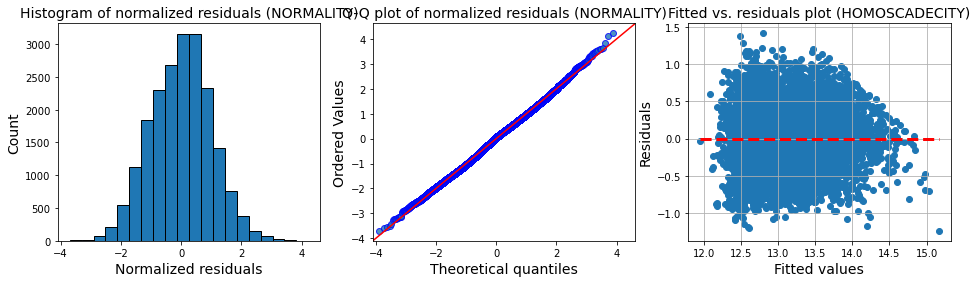

In [628]:
normality_homoscadecity(model);

In [629]:
multicollinearity(X)

,0
const,70.3675
sqft_living,4.1580
bathrooms,2.7718
grade,2.4590
floors,2.0140
spring,1.9325
summer,1.9234
fall,1.8149
sqft_basement,1.7183
bedrooms,1.6837


## MODEL #7
- removing `fall`, adding `age`

In [701]:
variables = ['sqft_living', 'sqft_lot', 'condition', 'grade',   'view' ,'waterfront', 
             'bedrooms','bathrooms','sqft_basement', 'floors',
             'summer', 'spring',
             'age<30'] 

y = data['log_price']
X = data[variables]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     2148.
Date:                Wed, 17 Aug 2022   Prob (F-statistic):               0.00
Time:                        20:38:48   Log-Likelihood:                -6116.7
No. Observations:               20239   AIC:                         1.226e+04
Df Residuals:                   20225   BIC:                         1.237e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            11.6066      0.019    613.381      0.000      11.569      11.644
sqft_living       0.0003   5.67e-06     45.997      0.000       0.000       0.000
sqft_lot      -4.091e-06   2.86e-07    -14.291      0.000   -4.65e-06   -3.53e-06
condition         0.0598      0.004     15.324      0.000       0.052       0.067
grade             0.0981      0.002     54.415      0.000       0.095       0.102
view              0.0666      0.004     18.369      0.000       0.059       0.074
waterfront        0.3313      0.034      9.691      0.000       0.264       0.398
bedrooms         -0.0492      0.004    -13.471      0.000      -0.056      -0.042
bathrooms         0.0311      0.006      5.494      0.000       0.020       0.042
sqft_basement  3.413e-05   7.35e-06      4.642      0.000    1.97e-05    4.85e-05
floors            0.1066      0.006     16.570      0.000       0.094       0.119
summer            0.0152      0.006      2.718      0.007       0.004       0.026
spring            0.0562      0.006     10.152      0.000       0.045       0.067
age<30           -0.2304      0.007    -31.251      0.000      -0.245      -0.216
==============================================================================
Omnibus:                       29.113   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.214
Skew:                          -0.090   Prob(JB):                     4.53e-07
Kurtosis:                       3.047   Cond. No.                     1.95e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.95e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

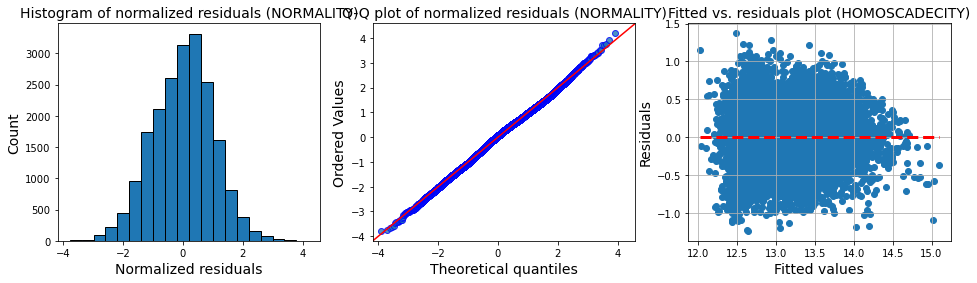

In [702]:
normality_homoscadecity(model);

In [703]:
multicollinearity(X)

,0
const,67.5774
sqft_living,4.1606
bathrooms,3.0785
grade,2.4774
age<30,2.3936
floors,2.2878
sqft_basement,1.7847
bedrooms,1.7099
view,1.3146
summer,1.2224


## FINAL MODEL #8
- adding Location Bins

In [777]:
variables = ['log_sqft_living', 'log_sqft_lot', 'condition', 'grade',   'view' ,'waterfront', 
             'bedrooms','bathrooms','sqft_basement', 'floors',
             'summer', 'spring',
             'age<30',
             'east', 'north', 'seattle']

y = data['log_price']
X = data[variables]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     3690.
Date:                Wed, 17 Aug 2022   Prob (F-statistic):               0.00
Time:                        22:03:42   Log-Likelihood:                -1070.7
No. Observations:               20239   AIC:                             2175.
Df Residuals:                   20222   BIC:                             2310.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               7.5610      0.060    126.635      0.000       7.444       7.678
log_sqft_living     0.5542      0.010     55.240      0.000       0.535       0.574
log_sqft_lot        0.0125      0.003      3.565      0.000       0.006       0.019
condition           0.0731      0.003     23.986      0.000       0.067       0.079
grade               0.0774      0.001     54.768      0.000       0.075       0.080
view                0.0708      0.003     25.042      0.000       0.065       0.076
waterfront          0.4260      0.027     15.973      0.000       0.374       0.478
bedrooms           -0.0293      0.003     -9.857      0.000      -0.035      -0.023
bathrooms           0.0463      0.004     10.300      0.000       0.037       0.055
sqft_basement   -6.295e-05   6.13e-06    -10.261      0.000    -7.5e-05   -5.09e-05
floors              0.0036      0.006      0.647      0.518      -0.007       0.014
summer              0.0041      0.004      0.947      0.344      -0.004       0.013
spring              0.0487      0.004     11.293      0.000       0.040       0.057
age<30             -0.0982      0.006    -16.361      0.000      -0.110      -0.086
east                0.4735      0.005     96.889      0.000       0.464       0.483
north               0.3271      0.008     39.239      0.000       0.311       0.343
seattle             0.5610      0.006    101.617      0.000       0.550       0.572
==============================================================================
Omnibus:                      477.665   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1118.458
Skew:                          -0.027   Prob(JB):                    1.35e-243
Kurtosis:                       4.150   Cond. No.                     1.68e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.68e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
- for every 1% increase in sqft, .55 % increase in price. 

In [767]:
variables = ['sqft_living', 'sqft_lot', 'condition', 'grade',   'view' ,'waterfront', 
             'bedrooms','bathrooms','sqft_basement',
             'spring',
             'age<30',
             'east', 'north', 'seattle']

y = data['price']
X = data[variables]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     3115.
Date:                Wed, 17 Aug 2022   Prob (F-statistic):               0.00
Time:                        21:58:39   Log-Likelihood:            -2.7289e+05
No. Observations:               20239   AIC:                         5.458e+05
Df Residuals:                   20224   BIC:                         5.459e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4.211e+05   1.01e+04    -41.700      0.000   -4.41e+05   -4.01e+05
sqft_living     202.6377      3.018     67.144      0.000     196.722     208.553
sqft_lot         -0.2428      0.157     -1.549      0.121      -0.550       0.064
condition      3.867e+04   2070.742     18.676      0.000    3.46e+04    4.27e+04
grade          3.847e+04    959.050     40.111      0.000    3.66e+04    4.03e+04
view           5.581e+04   1927.717     28.952      0.000     5.2e+04    5.96e+04
waterfront     4.317e+05   1.81e+04     23.808      0.000    3.96e+05    4.67e+05
bedrooms      -2.785e+04   1953.722    -14.255      0.000   -3.17e+04    -2.4e+04
bathrooms       2.52e+04   2944.112      8.559      0.000    1.94e+04     3.1e+04
sqft_basement   -57.9937      3.729    -15.553      0.000     -65.302     -50.685
spring         2.769e+04   2658.503     10.414      0.000    2.25e+04    3.29e+04
age<30        -9.464e+04   3707.647    -25.525      0.000   -1.02e+05   -8.74e+04
east           2.042e+05   3331.138     61.313      0.000    1.98e+05    2.11e+05
north          1.069e+05   5672.707     18.844      0.000    9.58e+04    1.18e+05
seattle        2.555e+05   3439.291     74.280      0.000    2.49e+05    2.62e+05
==============================================================================
Omnibus:                     9753.351   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           118108.914
Skew:                           2.014   Prob(JB):                         0.00
Kurtosis:                      14.128   Cond. No.                     1.95e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.95e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [737]:
coefs = model.params.apply('{0:.6f}'.format)
coefs = pd.DataFrame(coefs).reset_index()
coefs = coefs.rename({'index':'var', 0:'coef'}, axis =1)
coefs.coef = pd.to_numeric(coefs.coef)
coefs

,var,coef
0,const,11.253681
1,sqft_living,0.000263
2,sqft_lot,0.000001
3,condition,0.076203
4,grade,0.076762
5,view,0.062815
6,waterfront,0.431510
7,bedrooms,-0.013190
8,bathrooms,0.057303
9,sqft_basement,-0.000064


In [738]:
coefs['exp_coef'] = ((np.exp(coefs.coef) - 1) * 100).apply('{0:.6f}'.format)
coefs

,var,coef,exp_coef
0,const,11.253681,7716243.624128
1,sqft_living,0.000263,0.026303
2,sqft_lot,0.000001,0.000100
3,condition,0.076203,7.918163
4,grade,0.076762,7.978506
5,view,0.062815,6.482983
6,waterfront,0.431510,53.958054
7,bedrooms,-0.013190,-1.310339
8,bathrooms,0.057303,5.897663
9,sqft_basement,-0.000064,-0.006400


In [741]:
data.sqft_living.mean()

2017.7031967982607

- For every one unit increase in sqft_living price increases by about .026 %
- FOR every 100 sqft increase in the house Price increases by about 2.6 %
- Avergae SF is 2000, if you increase 2000 to 3000 you would increase price by 26%

- For every one unit increase in bathrooms price increases by 5.8 %

- Being waterfront (1) increases price by 53% compared to being non waterfront (if all other factors the same). 
- Houses sold in spring are 4.7% more expensive than those sold in other seasons. 


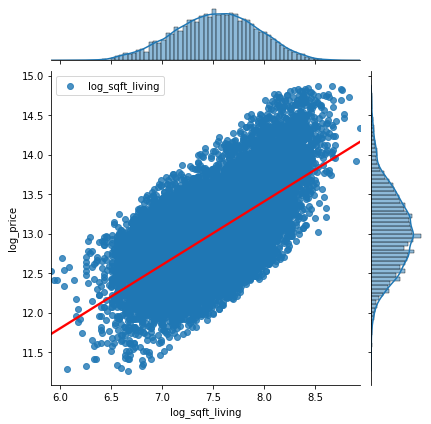

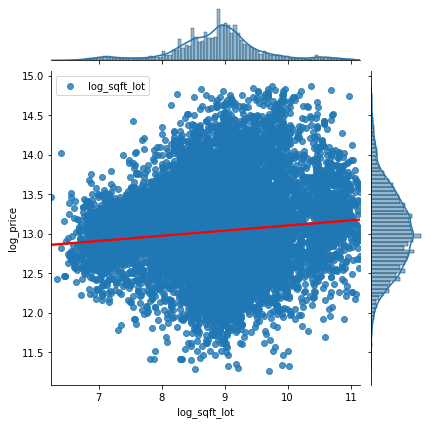

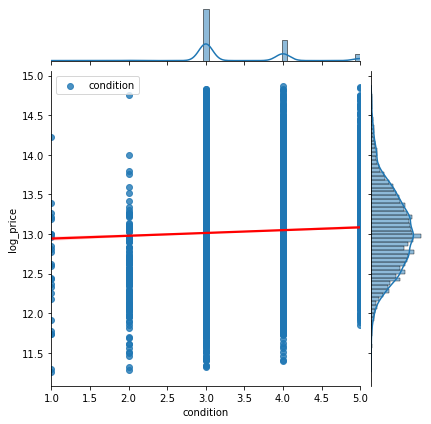

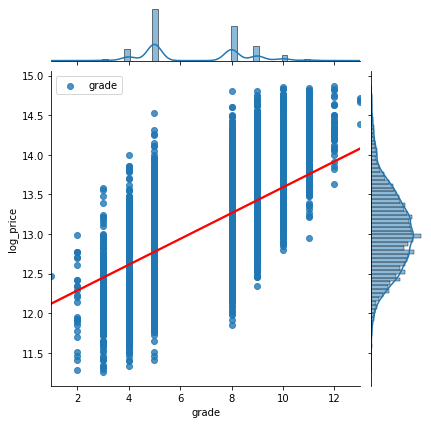

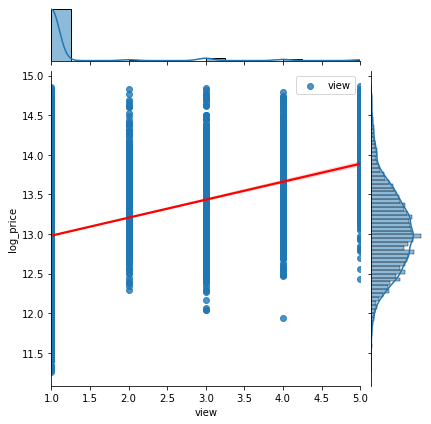

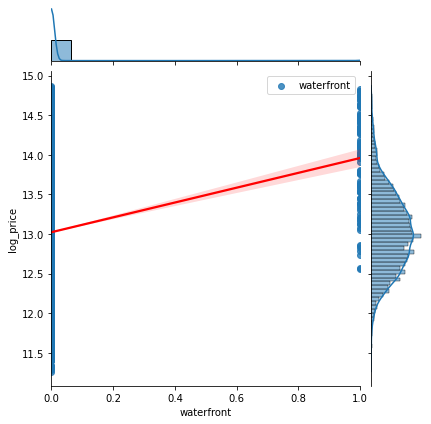

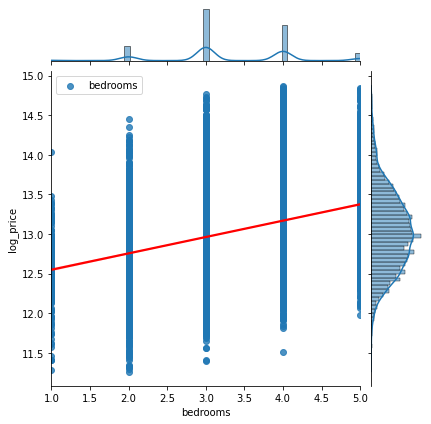

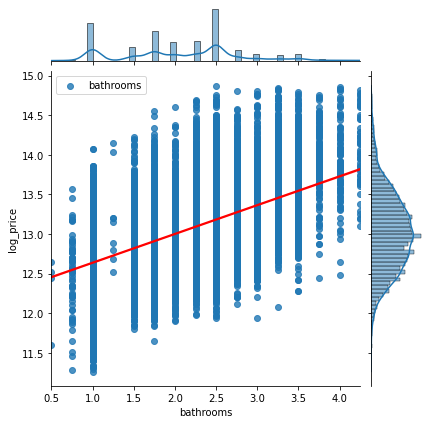

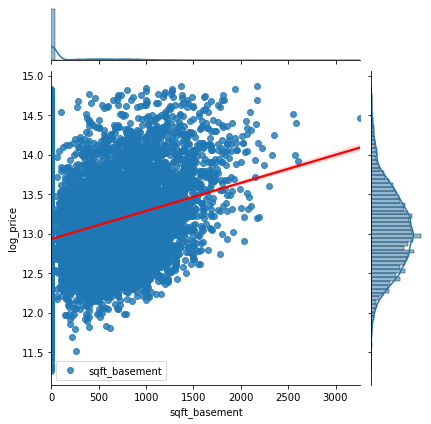

In [778]:
variables = ['log_sqft_living', 'log_sqft_lot', 'condition', 'grade',   'view' ,'waterfront', 
             'bedrooms','bathrooms','sqft_basement']

for column in variables:
    sns.jointplot(x=column, y="log_price", data=data, kind='reg', label=column,joint_kws={'line_kws':{'color':'red'}})
    plt.legend()
    plt.show()

##  why bedrooms negative??
## Log transformed Price: 1% increase in sqrt_living results in .04% increase in price? 
## Houses sold in spring are 4.5 % more expensive than those sold in other seasons?
## Houses in east are 50% more expensive than those in south?
## How to compare Seattle to East? 
## If I want to know relative importance of those variables then strandardize? But not interpret the coefs?
## Comment on which values? Skew, Kurtosis, Durbin Watson? JB is always so high!!!
## Collinearity, normality, homoscadecity checked. Not care about overfitting, underfitting etc. 
## Final graphs from powerpoint, regression graphs?
## Log trans not working
## .7 as the corr heat map

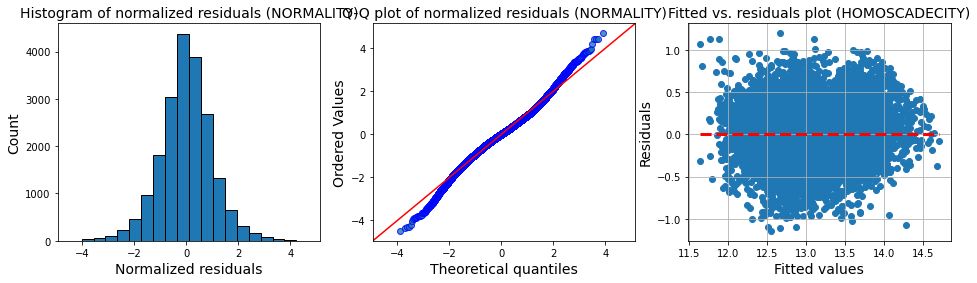

In [775]:
normality_homoscadecity(model);

In [636]:
multicollinearity(X)

,0
const,68.4511
sqft_living,4.1924
bathrooms,2.9625
grade,2.4945
age<30,2.1530
seattle,1.8181
bedrooms,1.7398
east,1.6454
sqft_basement,1.6322
view,1.3221


## MODEL #9

In [719]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20239 entries, 0 to 21419
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   price                 20239 non-null  float64
 1   bedrooms              20239 non-null  int64  
 2   bathrooms             20239 non-null  float64
 3   sqft_living           20239 non-null  int64  
 4   sqft_lot              20239 non-null  int64  
 5   floors                20239 non-null  float64
 6   waterfront            20239 non-null  int64  
 7   view                  20239 non-null  int64  
 8   condition             20239 non-null  int64  
 9   grade                 20239 non-null  int64  
 10  sqft_above            20239 non-null  int64  
 11  sqft_basement         20239 non-null  float64
 12  lat                   20239 non-null  float64
 13  long                  20239 non-null  float64
 14  sqft_living15         20239 non-null  int64  
 15  sqft_lot15         

In [725]:
data[f"scaled_"+var] = 9898
data[f"scaled_"+var]

0        9898
1        9898
2        9898
3        9898
4        9898
         ... 
21415    9898
21416    9898
21417    9898
21418    9898
21419    9898
Name: scaled_sqft_living, Length: 20239, dtype: int64

In [732]:
to_standardize = ['sqft_living', 'sqft_lot', 'condition', 'grade', 'bedrooms','bathrooms','sqft_basement']
   
for var in to_standardize:
    data[f"scaled_{var}"] = (data[var] - np.mean(data[var])) / np.std(data[var])
    

In [733]:
variables = ['scaled_sqft_living', 'scaled_sqft_lot', 'scaled_condition',  'scaled_grade' , 'view' ,'waterfront', 
             'scaled_bedrooms','scaled_bathrooms', 'scaled_sqft_basement',
            'spring', 
             'age<30',
             'east', 'north', 'seattle']

y = data['log_price']
X = data[variables]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     4226.
Date:                Wed, 17 Aug 2022   Prob (F-statistic):               0.00
Time:                        21:15:04   Log-Likelihood:                -1056.3
No. Observations:               20239   AIC:                             2143.
Df Residuals:                   20224   BIC:                             2261.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   12.6108      0.006   2187.472      0.000      12.599      12.622
scaled_sqft_living       0.2180      0.004     59.379      0.000       0.211       0.225
scaled_sqft_lot          0.0049      0.002      2.410      0.016       0.001       0.009
scaled_condition         0.0496      0.002     25.055      0.000       0.046       0.053
scaled_grade             0.1543      0.003     54.495      0.000       0.149       0.160
view                     0.0628      0.003     22.186      0.000       0.057       0.068
waterfront               0.4315      0.027     16.204      0.000       0.379       0.484
scaled_bedrooms         -0.0109      0.002     -4.597      0.000      -0.016      -0.006
scaled_bathrooms         0.0409      0.003     13.252      0.000       0.035       0.047
scaled_sqft_basement    -0.0268      0.002    -11.723      0.000      -0.031      -0.022
spring                   0.0465      0.004     11.907      0.000       0.039       0.054
age<30                  -0.1028      0.005    -18.871      0.000      -0.113      -0.092
east                     0.4607      0.005     94.156      0.000       0.451       0.470
north                    0.3274      0.008     39.293      0.000       0.311       0.344
seattle                  0.5433      0.005    107.561      0.000       0.533       0.553
==============================================================================
Omnibus:                      593.907   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1387.281
Skew:                          -0.136   Prob(JB):                    5.70e-302
Kurtosis:                       4.254   Cond. No.                         27.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [734]:
model.params.apply('{0:.9f}'.format)

const                   12.610778967
scaled_sqft_living       0.217951185
scaled_sqft_lot          0.004901171
scaled_condition         0.049561273
scaled_grade             0.154292908
view                     0.062815376
waterfront               0.431510085
scaled_bedrooms         -0.010868872
scaled_bathrooms         0.040888072
scaled_sqft_basement    -0.026848260
spring                   0.046495125
age<30                  -0.102766550
east                     0.460672971
north                    0.327382148
seattle                  0.543342954
dtype: object

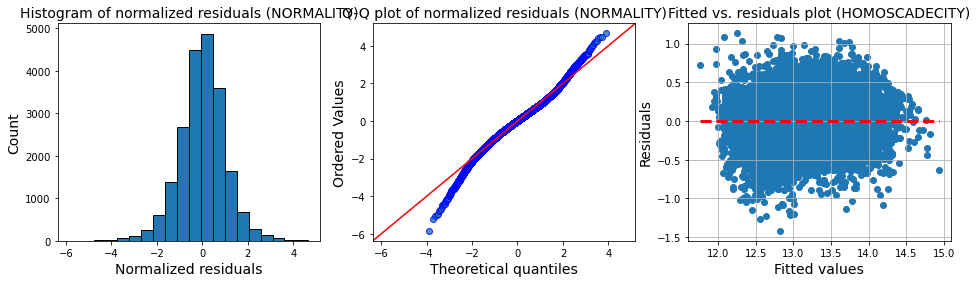

In [264]:
normality_homoscadecity(model);

In [265]:
multicollinearity(X)

,0
const,447739.0042
lat,3.8007
south,3.6012
sqft_living,3.0292
grade,2.5041
floors,2.0859
seattle,2.0176
age,1.9334
sqft_basement,1.7791
north,1.3764


- Durbin-Watson score is between 1.5 and 2.5, meaning: no first-order autocorrelation
- Skewness is between -0.5 and 0.5, it is approximately symmetric.
- Kurtosis is 4 which is not ideal. An increased kurtosis (>3) can be visualized as a thinner “bell” with a higher peak. 
- Hair et al. (2010) and Bryne (2010) argues that data is considered normal if skewness is between ‐2 to +2 and kurtosis is between ‐7 to +7.

In [236]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

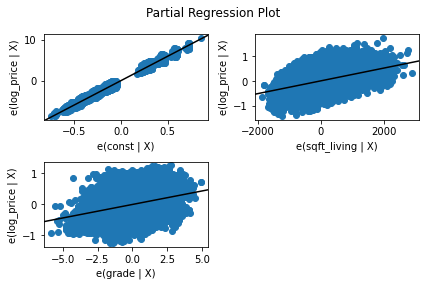

In [246]:
fig = sm.graphics.plot_partregress_grid(model)
fig.tight_layout(pad=1.0)

# RESULTING GRAPHS FORM THE REGRESSION

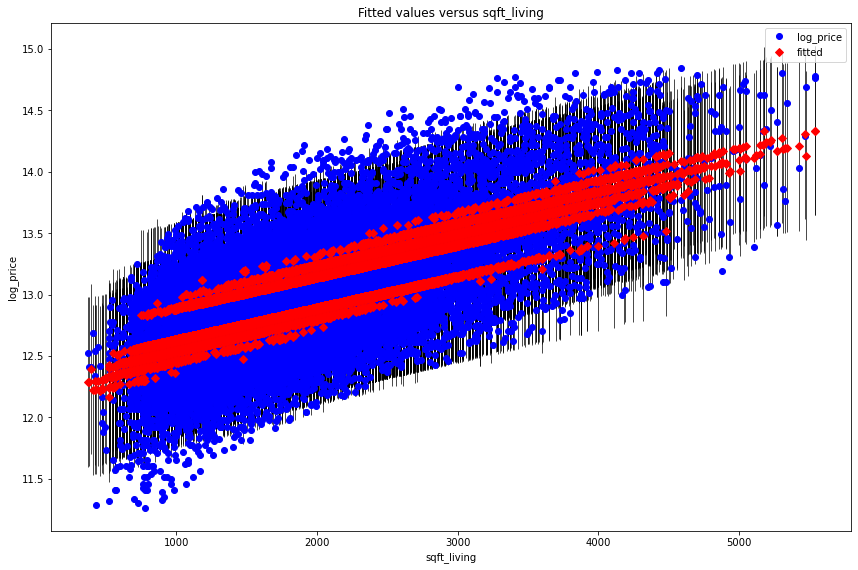

In [257]:
fig, ax = plt.subplots(figsize=(12, 8))
fig = sm.graphics.plot_fit(model, "sqft_living", ax=ax)
fig.tight_layout(pad=1.0)

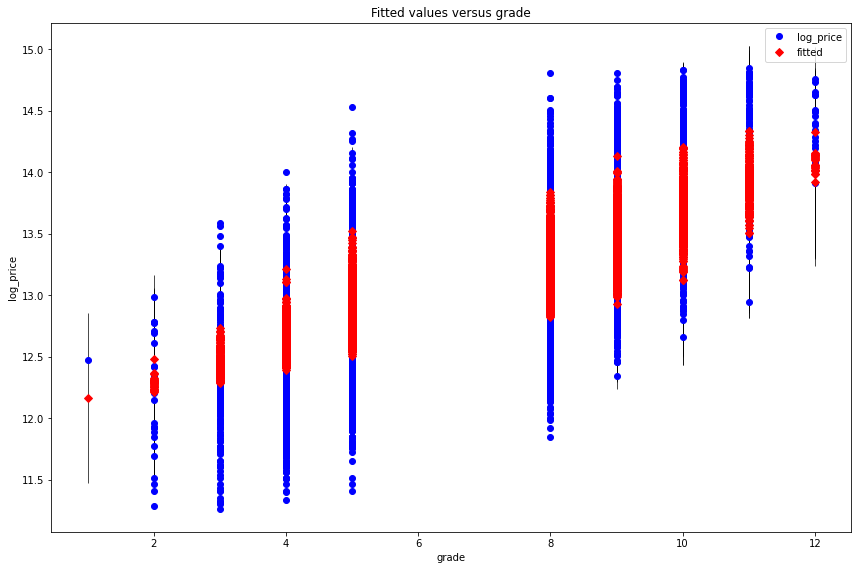

In [258]:
fig, ax = plt.subplots(figsize=(12, 8))
fig = sm.graphics.plot_fit(model, "grade", ax=ax)
fig.tight_layout(pad=1.0)

##  Log transformed Price: Houses sold in spring are 4% more expensive than those sold in winter or summer. 
## Log transformed Price: 1% increase in sqrt_living results in .02% increase in price? 
## Log transformed Price and SQFT_LIVING: 100% increase in sqrt_living results in .02% increase in price?

## SCALING DO MIN MAX

- Durbin-Watson score is between 1.5 and 2.5, meaning: no first-order autocorrelation

In [137]:
'''
categorical = ['bedrooms', 'floors', 'waterfront', 'grade', 'bathrooms']
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(16,3))
for xcol, ax in zip(categorical, axes):
    df.plot(kind='scatter', x=xcol, y='price', sharey=True, ax=ax, alpha=0.4, color='b')
'''

"\ncategorical = ['bedrooms', 'floors', 'waterfront', 'grade', 'bathrooms']\nimport matplotlib.pyplot as plt\n%matplotlib inline\n\nfig, axes = plt.subplots(nrows=1, ncols=5, figsize=(16,3))\nfor xcol, ax in zip(categorical, axes):\n    df.plot(kind='scatter', x=xcol, y='price', sharey=True, ax=ax, alpha=0.4, color='b')\n"

In [138]:
'''
For every grade a house increases, its value is expected to rise $112,000
Houses in an active market command higher prices than similar houses in less active markets
If a house is located on a waterfront, it is expected to be worth $143,200 more
Houses renovated within the last 25 years are expected to be worth $21,180 more.
Each additional floor added to a house is expected to increase its worth $29,520.
The model does not incorporate the age of houses built since 1980. Houses in older age groups tend to be worth more, perhaps because of urban locations.

'''

'\nFor every grade a house increases, its value is expected to rise $112,000\nHouses in an active market command higher prices than similar houses in less active markets\nIf a house is located on a waterfront, it is expected to be worth $143,200 more\nHouses renovated within the last 25 years are expected to be worth $21,180 more.\nEach additional floor added to a house is expected to increase its worth $29,520.\nThe model does not incorporate the age of houses built since 1980. Houses in older age groups tend to be worth more, perhaps because of urban locations.\n\n'

In [139]:
'''
cat_data = df.loc[:, (df.dtypes != 'object')]
fig, axes = plt.subplots(nrows=(cat_data.shape[1] // 3), ncols=3, figsize=(16,40))
categoricals = [column for column in cat_data.columns]
for col, ax in zip(categoricals, axes.flatten()):
    ax.hist(df[col].dropna(), bins='auto')
    ax.set_title(col)
    
    
#To get an initial visualization of numeric predictor variables we build joint plots for them against the target variable of price.

numeric_variables_df = df.drop('zipcode', axis=1).copy()

def make_jp(data):
    """Make joint plot of each predictor variable and target variable"""
    for i, col in enumerate(data):
        sns.jointplot(data[col], df['price'], kind='reg', color='k', scatter_kws={'alpha':0.15}, height=5)
        plt.title(f'price by {col}')
        plt.tight_layout()
make_jp(numeric_variables_df)

'''

'\ncat_data = df.loc[:, (df.dtypes != \'object\')]\nfig, axes = plt.subplots(nrows=(cat_data.shape[1] // 3), ncols=3, figsize=(16,40))\ncategoricals = [column for column in cat_data.columns]\nfor col, ax in zip(categoricals, axes.flatten()):\n    ax.hist(df[col].dropna(), bins=\'auto\')\n    ax.set_title(col)\n    \n    \n#To get an initial visualization of numeric predictor variables we build joint plots for them against the target variable of price.\n\nnumeric_variables_df = df.drop(\'zipcode\', axis=1).copy()\n\ndef make_jp(data):\n    """Make joint plot of each predictor variable and target variable"""\n    for i, col in enumerate(data):\n        sns.jointplot(data[col], df[\'price\'], kind=\'reg\', color=\'k\', scatter_kws={\'alpha\':0.15}, height=5)\n        plt.title(f\'price by {col}\')\n        plt.tight_layout()\nmake_jp(numeric_variables_df)\n\n'